# Does maximisation of net carbon profit explain vegetation behaviour in savanna sites along a precipitation gradient?

It was shown by Whitley et al. (2016) that six models that expliticly included land surface exchange and vegetation dynamics (i.e. terrestial biosphere models, TBM's) were not able to represent, especially, the wet season dynamics in savanna regions. This reflects generally the simplicity used in the current generation TBM's with regard to modelling vegetation, which becomes especially apparent in the more complex ecosystems of savannas. The understanding of these more complex interactions between vegetation, water and climate in savanna-sites is therefore crucial in order to improve modelling with TBM's. 
Similar to the model inter-comparison presented by Whitley et al. (2016), in this study a coupled water-vegetation model (VOM, Schymanski et al. 2009) is applied in several savanna sites. In this case, the model is optimized for net carbon profit,  hypothezing that 1) net carbon profit is an important objective for ecosystems and 2) the (wet season) dynamics of savanna sites can be explained more satisfactory with an optimality-based model.



## Methods

# Study Areas

Five study areas along the North-Australian Tropical Transect were selected:
- Adelaide River
- Daly Uncleared
- Dry River
- Howard Springs
- (Sturt Plains)

The model was assumed to represent the catchment-scale. Therefore, the system boundaries were set equal to to smallest possible catchment that included the fluxtower, with a similar order of magnitude as the the fetch of the tower (approx. 50m). See also the figure below for the schematized basin of Howard Springs, with the fluxtower represented as a red dot with a 50m-wide off-set around it.

<img src="../data/VOM_input/plot_basin.png"
     alt="Basin example"
     style="float: left; margin-right: 5px; height: 200px" />
     
     
# Optimization procedure
The Shuffled Complex Evolution (SCE) algorithm was used to optimize the VOM. Now, it was just run once for each study area, but eventually the SCE-algorithm will be run four times to avoid converging towards local optima. The best 10% of all solutions will be kept in order to construct uncertainty bounds

 





## Results

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
#load fluxtower evaporation data
    
#observations from OzFlux sites
ea0 = np.loadtxt("../data/DINGO/Ea_adelaide.txt", usecols=2) #mm/d
ea1 = np.loadtxt("../data/DINGO/Ea_daly.txt", usecols=2) #mm/d
ea2 = np.loadtxt("../data/DINGO/Ea_dry.txt", usecols=2) #mm/d
ea3 = np.loadtxt("../data/DINGO/Ea_howard.txt", usecols=2) #mm/d
ea4 = np.loadtxt("../data/DINGO/Ea_sturt.txt", usecols=2) #mm/d

In [4]:
#load GPP data fluxtower
gpp0 = np.loadtxt("../data/DINGO/GPPdaily_adelaide.txt", usecols=2) #mol/m2/d
gpp1 = np.loadtxt("../data/DINGO/GPPdaily_daly.txt", usecols=2) #mol/m2/d
gpp2 = np.loadtxt("../data/DINGO/GPPdaily_dry.txt", usecols=2) #mol/m2/d
gpp3 = np.loadtxt("../data/DINGO/GPPdaily_howard.txt", usecols=2) #mol/m2/d
gpp4 = np.loadtxt("../data/DINGO/GPPdaily_sturt.txt", usecols=2) #mol/m2/d

In [5]:
#derive date
tflux0 = np.genfromtxt("../data/DINGO/Ea_adelaide.txt",usecols=0, dtype=np.str )#mm/d
tflux0 = pd.date_range(tflux0[0], tflux0[-1], freq='D')

tflux1 = np.genfromtxt("../data/DINGO/Ea_daly.txt",usecols=0, dtype=np.str )#mm/d
tflux1 = pd.date_range(tflux1[0], tflux1[-1], freq='D')

tflux2 = np.genfromtxt("../data/DINGO/Ea_dry.txt",usecols=0, dtype=np.str )#mm/d
tflux2 = pd.date_range(tflux2[0], tflux2[-1], freq='D')

tflux3 = np.genfromtxt("../data/DINGO/Ea_howard.txt",usecols=0, dtype=np.str )#mm/d
tflux3 = pd.date_range(tflux3[0], tflux3[-1], freq='D')

tflux4 = np.genfromtxt("../data/DINGO/Ea_sturt.txt",usecols=0, dtype=np.str )#mm/d
tflux4 = pd.date_range(tflux4[0], tflux4[-1], freq='D')


In [6]:
lat_heat_vapor = 2.45   #[MJ/kg] 
rho_w = 997             #[kg/m3]


data_adelaide = np.loadtxt("../data/VOM_input/AdelaideRiver/dailyweather.prn", skiprows=1 )
tmod0 = np.arange(datetime(int(data_adelaide[0,3]),int(data_adelaide[0,2]),int(data_adelaide[0,1])), 
                  datetime(int(data_adelaide[-1,3]),int(data_adelaide[-1,2]),int(data_adelaide[-1,1])), 
                  timedelta(days=1)).astype(datetime)
prec = np.zeros([5, len(tmod0)+1 ])

ep0 = 1000*data_adelaide[:, 7]/(lat_heat_vapor*rho_w) #mm/d
prec[0,:] = data_adelaide[:, 6] #mm/d

data_daly = np.loadtxt("../data/VOM_input/DalyUncleared/dailyweather.prn", skiprows=1 )
tmod1 = np.arange(datetime(int(data_daly[0,3]),int(data_daly[0,2]),int(data_daly[0,1])), 
                  datetime(int(data_daly[-1,3]),int(data_daly[-1,2]),int(data_daly[-1,1])), 
                  timedelta(days=1)).astype(datetime)
ep1 = 1000*data_daly[:, 7]/(lat_heat_vapor*rho_w) #mm/d
prec[1,:] = data_daly[:, 6] #mm/d

data_dry = np.loadtxt("../data/VOM_input/DryRiver/dailyweather.prn", skiprows=1 )
tmod2 = np.arange(datetime(int(data_dry[0,3]),int(data_dry[0,2]),int(data_dry[0,1])), 
                  datetime(int(data_dry[-1,3]),int(data_dry[-1,2]),int(data_dry[-1,1])), 
                  timedelta(days=1)).astype(datetime)
ep2 = 1000*data_dry[:, 7]/(lat_heat_vapor*rho_w) #mm/d
prec[2,:] = data_dry[:, 6] #mm/d

data_howard = np.loadtxt("../data/VOM_input/HowardSprings/dailyweather.prn", skiprows=1 )
tmod3 = np.arange(datetime(int(data_howard[0,3]),int(data_howard[0,2]),int(data_howard[0,1])), 
                  datetime(int(data_howard[-1,3]),int(data_howard[-1,2]),int(data_howard[-1,1])), 
                  timedelta(days=1)).astype(datetime)
ep3 = 1000*data_howard[:, 7]/(lat_heat_vapor*rho_w) #mm/d
prec[3,:] = data_howard[:, 6] #mm/d

data_sturt = np.loadtxt("../data/VOM_input/SturtPlains/dailyweather.prn", skiprows=1 )
tmod4 = np.arange(datetime(int(data_sturt[0,3]),int(data_sturt[0,2]),int(data_sturt[0,1])), 
                  datetime(int(data_sturt[-1,3]),int(data_sturt[-1,2]),int(data_sturt[-1,1])), 
                  timedelta(days=1)).astype(datetime)
ep4 = 1000*data_sturt[:, 7]/(lat_heat_vapor*rho_w) #mm/d
prec[4,:] = data_sturt[:, 6] #mm/d





## Compare with fluxtowers
Time series of total modelled evaporation and CO<sub>2</sub> assimilation(soil and transpiration from perennial and seasonal vegetation) are compared with evaporation and Gross Primary Productivity (GPP) from the fluxtowers. Generally, there is an off-set between modelled and observed CO<sub>2</sub>-values in the transition between the dry and wet period around March-April.

The emperical benchmarks are defined as a simple linear relation between downward shortwave radiation (Rs) and GPP or total evaporation (emp1), and a linear relation between downward shortwave radiation (Rs), temperature (Ta) and vapour pressure deficit (VPD) and GPP or total evaporation (emp2). This is based on the fluxtower data and similar to Whitley et al. (2016).




<Figure size 1280x400 with 0 Axes>

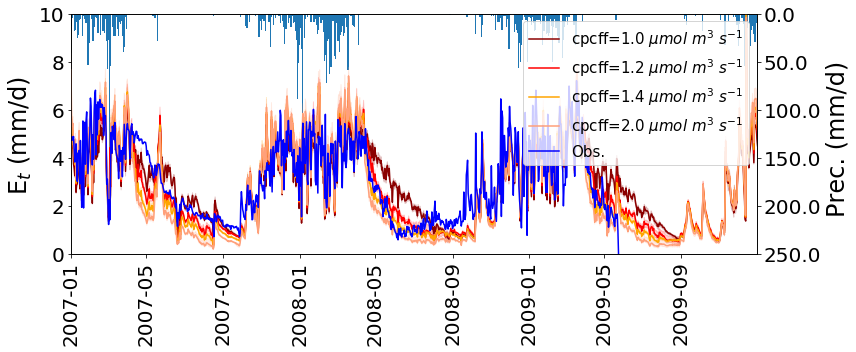

<Figure size 1280x400 with 0 Axes>

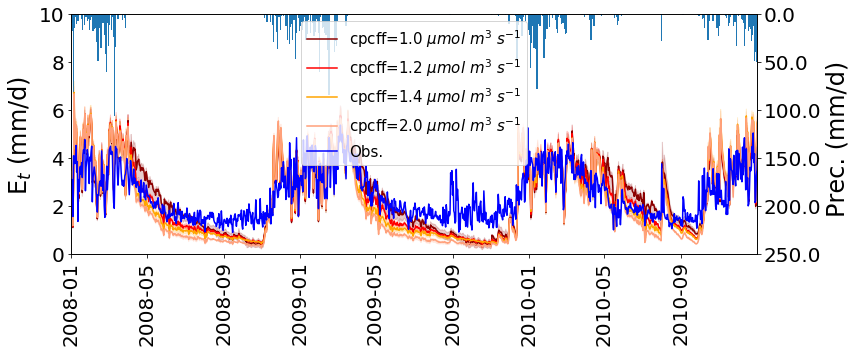

<Figure size 1280x400 with 0 Axes>

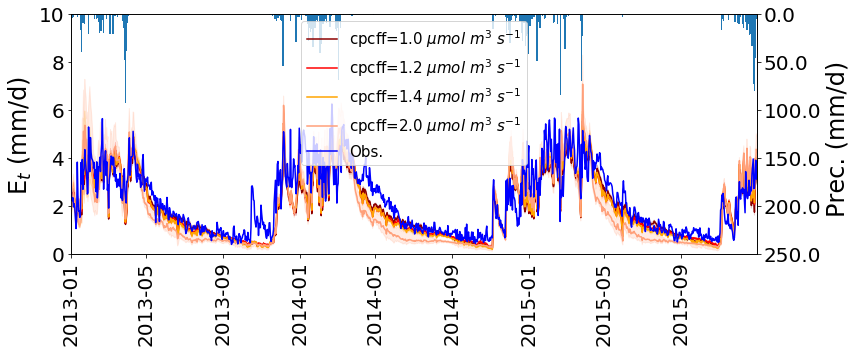

<Figure size 1280x400 with 0 Axes>

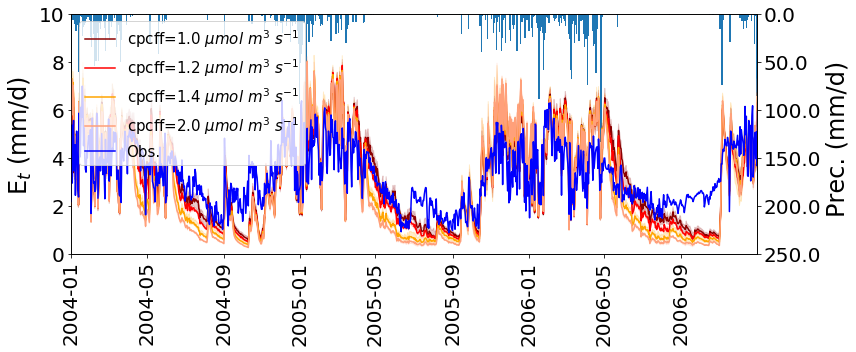

<Figure size 1280x400 with 0 Axes>

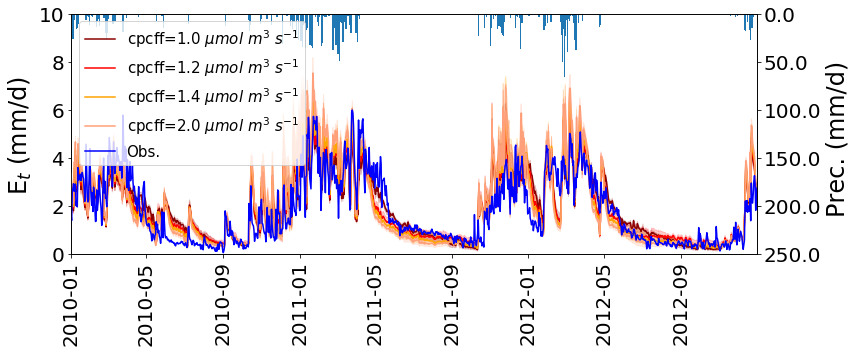

In [33]:
#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]
directory = ["freedrainage_cpcff1.0", 
             "freedrainage_cpcff1.2",
             "freedrainage_cpcff1.4",
             "freedrainage_cpcff2.0",
             "nofreedrainage_cpcff1.0",
             "nofreedrainage_cpcff1.2",
             "nofreedrainage_cpcff1.4",
             "nofreedrainage_cpcff2.0"]



#year to plot per catchment
yearstart = [2007, 2008, 2013, 2004, 2010]
yearend = [2009, 2010, 2015, 2006, 2012] 

colors = ['darkred','red','orange','lightsalmon','green', 'orange' ]
#labels = ['cpcff=1.0 umol m3 s-1', 'cpcff=1.2','cpcff=1.4','cpcff=2.0']
labels = [r'cpcff=1.0 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.2 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.4 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=2.0 $\mu$$mol$ $m^3$ $s^{-1}$' ]



suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
    
 

    #for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
for ibasin in  np.array([ 0, 1, 2, 3, 4 ]):  

    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
    

    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k' )
    fig, ((ax0 ))  = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))        

    
    #get benchmark
    #exec("emp1 = np.genfromtxt('../output/" + 
    #     basin[ibasin] + "/result_freedrainage/ea_emp1.txt', usecols=1, dtype=np.float)") #mm/d 

    #exec("emp2 = np.genfromtxt('../output/" + 
    #     basin[ibasin] + "/result_freedrainage/ea_emp2.txt', usecols=1, dtype=np.float)") #mm/d 
    
    #exec("t_emp = np.genfromtxt('../output/" + 
    #     basin[ibasin] + "/result_freedrainage/ea_emp1.txt', usecols=0, dtype=np.str)") #mm/d 
    #t_emp = pd.date_range(t_emp[0], t_emp[-1], freq='D')
    
    #load best run
 
    
    
    for irun in range(0,4):

        exec("best_data = np.genfromtxt('../data/VOM_output/" + 
         basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_best.txt', skip_header=1)") #mm/d
        #load emax
        exec("max_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_max.txt', skiprows = 1)") #mm/d

        exec("min_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_min.txt', skiprows = 1)") #mm/d
        
        ebest = best_data[:,10] + best_data[:,26] + best_data[:,27]
        emax_tmp = max_mod[:,10] + max_mod[:,26] + max_mod[:,27]
        emin_tmp = min_mod[:,10] + min_mod[:,26] + min_mod[:,27]  
        
        ax0.fill_between(tm[0:len(emax_tmp)], emax_tmp*1000,  emin_tmp*1000, 
                          color=colors[irun],facecolor=colors[irun], zorder=0, alpha = 0.2 )
        ax0.plot(tm[0:len(emax_tmp)], ebest*1000, color=colors[irun], label=labels[irun], zorder=1)           

    ax0.plot(to, ea_tmp, color='blue', label='Obs.', zorder=1)
    #ax0.plot(t_emp, emp1, color='lightgray', label='emp1', zorder=1)
    #ax0.plot(t_emp, emp2, color='darkgray', label='emp2', zorder=1)

    #ax0.set_ylabel('Et (mm/d)', size=24  )
    ax0.set_ylabel(r'E$_{t}$ (mm/d) ', size=24  )

    ax0.set_xlabel('' , size=24   )
    ax0.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin] ,12, 31)]) 
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        tick.label.set_rotation(90)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.set_ylim( [0,10] )
    ax0.set_frame_on(True) # make it transparent
    
    #add rainfall on top
    ax1 = ax0.twinx()
    #ax1.plot(tm[0:len(emax_tmp)], -prec[ibasin,0:len(emax_tmp)])
    ax1.bar(tm[0:len(emax_tmp)], -prec[ibasin,0:len(emax_tmp)], width=2)

    #ax1.stem(tm[0:len(emax_tmp)],-prec[ibasin,0:len(emax_tmp)] ,markerfmt=" ", basefmt=" ")
    #print(max(prec[ibasin,0:len(emax_tmp)]))
    ax1.set_ylabel(r'Prec. (mm/d) ', size=24  )
    ax1.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin], 12, 31)])

    
    #set labels
    #max_pre = max(prec[ibasin,:])
    y1_ticks = np.linspace(0, 250, 6)
    y1_ticklabels = [str(i) for i in y1_ticks]
    ax1.set_yticks(-1 * y1_ticks)
    ax1.set_yticklabels(y1_ticklabels, fontsize = 20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax1.set_ylim( [-250, 0] )
    #fig.suptitle(basin[ibasin], x=0, y=1)
    
    
    ax0.legend(prop={'size':15})

    ax0.set_zorder(ax1.get_zorder()+1) # put ax in front of ax2
    ax0.patch.set_visible(False)
    plt.tight_layout()
    i_site = i_site + 1

    plt.show()


<Figure size 1280x400 with 0 Axes>

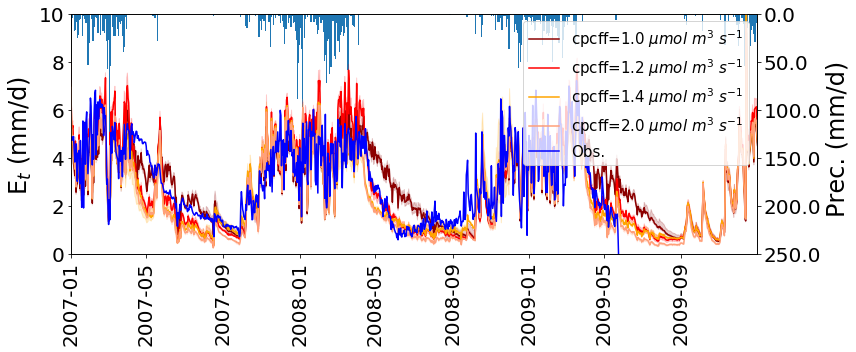

<Figure size 1280x400 with 0 Axes>

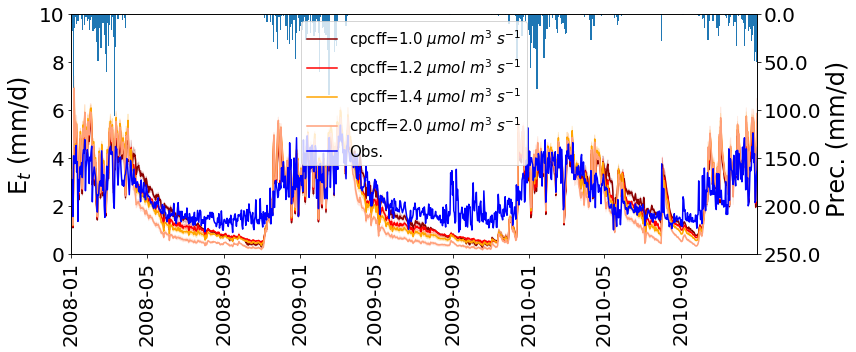

<Figure size 1280x400 with 0 Axes>

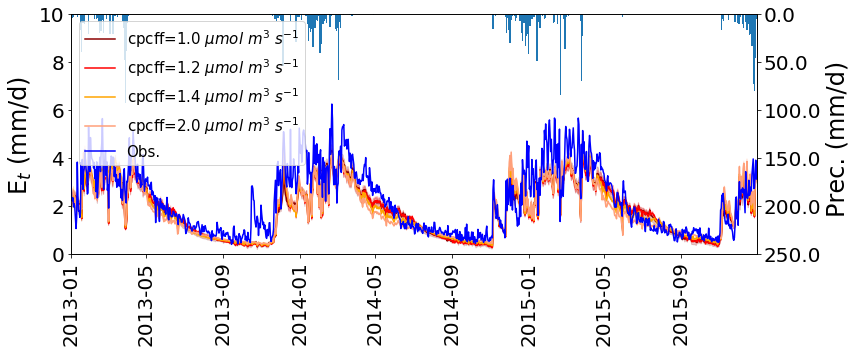

<Figure size 1280x400 with 0 Axes>

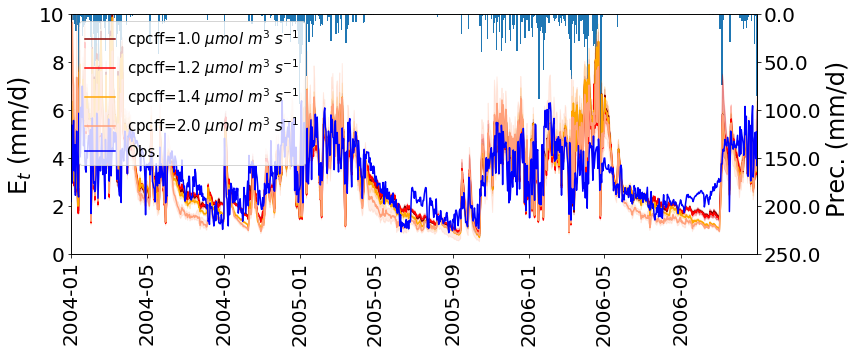

<Figure size 1280x400 with 0 Axes>

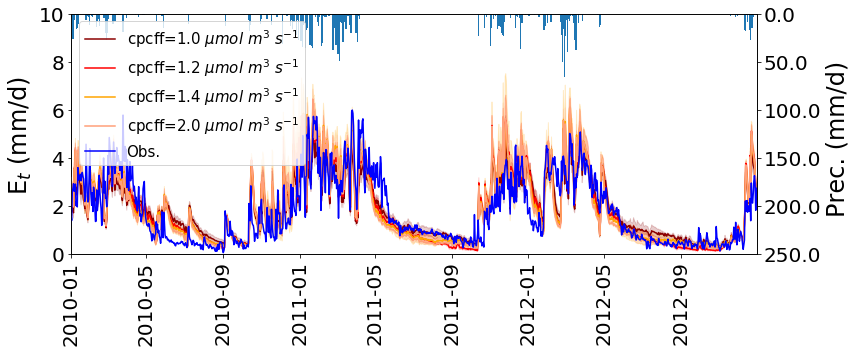

In [34]:
#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]
directory = ["nofreedrainage_cpcff1.0", 
             "nofreedrainage_cpcff1.2",
             "nofreedrainage_cpcff1.4",
             "nofreedrainage_cpcff2.0"]



#year to plot per catchment
yearstart = [2007, 2008, 2013, 2004, 2010]
yearend = [2009, 2010, 2015, 2006, 2012] 

colors = ['darkred','red','orange','lightsalmon','green', 'orange' ]
#labels = ['cpcff=1.0 umol m3 s-1', 'cpcff=1.2','cpcff=1.4','cpcff=2.0']
labels = [r'cpcff=1.0 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.2 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.4 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=2.0 $\mu$$mol$ $m^3$ $s^{-1}$' ]



suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
    
 

    #for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
for ibasin in  np.array([ 0, 1, 2, 3, 4 ]):  

    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
    

    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k' )
    fig, ((ax0 ))  = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))        

    
    #get benchmark
    #exec("emp1 = np.genfromtxt('../output/" + 
    #     basin[ibasin] + "/result_freedrainage/ea_emp1.txt', usecols=1, dtype=np.float)") #mm/d 

    #exec("emp2 = np.genfromtxt('../output/" + 
    #     basin[ibasin] + "/result_freedrainage/ea_emp2.txt', usecols=1, dtype=np.float)") #mm/d 
    
    #exec("t_emp = np.genfromtxt('../output/" + 
    #     basin[ibasin] + "/result_freedrainage/ea_emp1.txt', usecols=0, dtype=np.str)") #mm/d 
    #t_emp = pd.date_range(t_emp[0], t_emp[-1], freq='D')
    
    #load best run
 
    
    
    for irun in range(0,4):

        exec("best_data = np.genfromtxt('../data/VOM_output/" + 
         basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_best.txt', skip_header=1)") #mm/d
        #load emax
        exec("max_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_max.txt', skiprows = 1)") #mm/d

        exec("min_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_min.txt', skiprows = 1)") #mm/d
        
        ebest = best_data[:,10] + best_data[:,26] + best_data[:,27]
        emax_tmp = max_mod[:,10] + max_mod[:,26] + max_mod[:,27]
        emin_tmp = min_mod[:,10] + min_mod[:,26] + min_mod[:,27]  
        
        ax0.fill_between(tm[0:len(emax_tmp)], emax_tmp*1000,  emin_tmp*1000, 
                          color=colors[irun],facecolor=colors[irun], zorder=0, alpha = 0.2 )
        ax0.plot(tm[0:len(emax_tmp)], ebest*1000, color=colors[irun], label=labels[irun], zorder=1)           

    ax0.plot(to, ea_tmp, color='blue', label='Obs.', zorder=1)
    #ax0.plot(t_emp, emp1, color='lightgray', label='emp1', zorder=1)
    #ax0.plot(t_emp, emp2, color='darkgray', label='emp2', zorder=1)

    #ax0.set_ylabel('Et (mm/d)', size=24  )
    ax0.set_ylabel(r'E$_{t}$ (mm/d) ', size=24  )

    ax0.set_xlabel('' , size=24   )
    ax0.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin] ,12, 31)]) 
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        tick.label.set_rotation(90)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.set_ylim( [0,10] )
    ax0.set_frame_on(True) # make it transparent
    
    #add rainfall on top
    ax1 = ax0.twinx()
    #ax1.plot(tm[0:len(emax_tmp)], -prec[ibasin,0:len(emax_tmp)])
    ax1.bar(tm[0:len(emax_tmp)], -prec[ibasin,0:len(emax_tmp)], width=2)

    #ax1.stem(tm[0:len(emax_tmp)],-prec[ibasin,0:len(emax_tmp)] ,markerfmt=" ", basefmt=" ")
    #print(max(prec[ibasin,0:len(emax_tmp)]))
    ax1.set_ylabel(r'Prec. (mm/d) ', size=24  )
    ax1.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin], 12, 31)])

    
    #set labels
    #max_pre = max(prec[ibasin,:])
    y1_ticks = np.linspace(0, 250, 6)
    y1_ticklabels = [str(i) for i in y1_ticks]
    ax1.set_yticks(-1 * y1_ticks)
    ax1.set_yticklabels(y1_ticklabels, fontsize = 20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax1.set_ylim( [-250, 0] )
    #fig.suptitle(basin[ibasin], x=0, y=1)
    
    
    ax0.legend(prop={'size':15})

    ax0.set_zorder(ax1.get_zorder()+1) # put ax in front of ax2
    ax0.patch.set_visible(False)
    plt.tight_layout()
    i_site = i_site + 1

    plt.show()


203.4


<Figure size 1280x400 with 0 Axes>

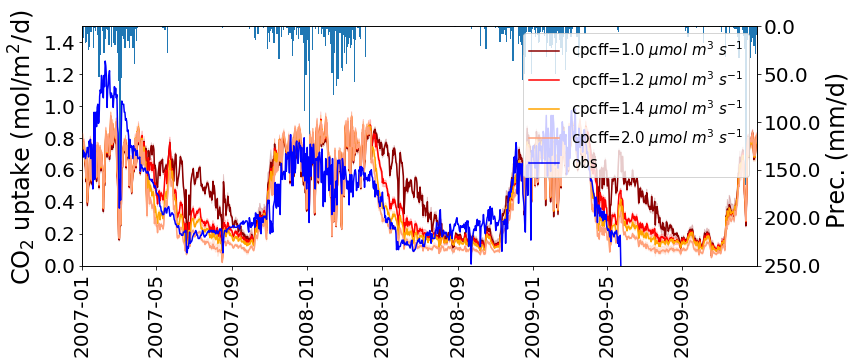

226.3


<Figure size 1280x400 with 0 Axes>

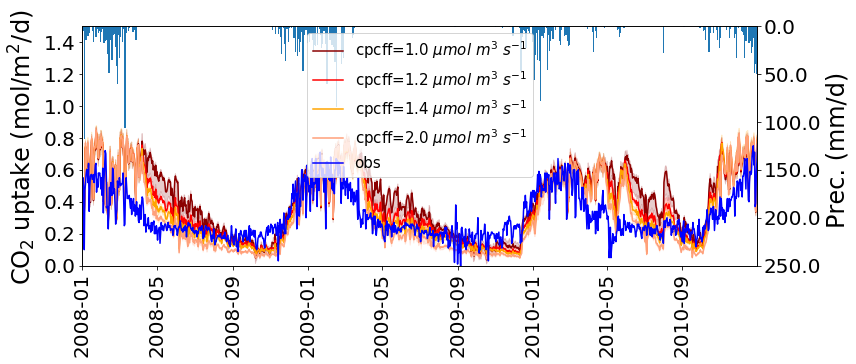

137.5


<Figure size 1280x400 with 0 Axes>

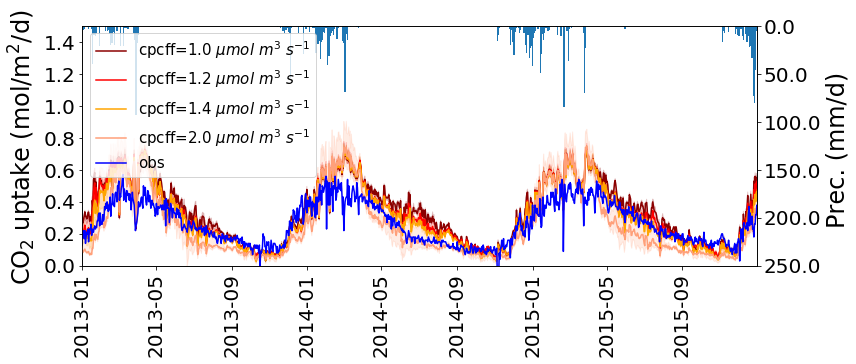

287.5


<Figure size 1280x400 with 0 Axes>

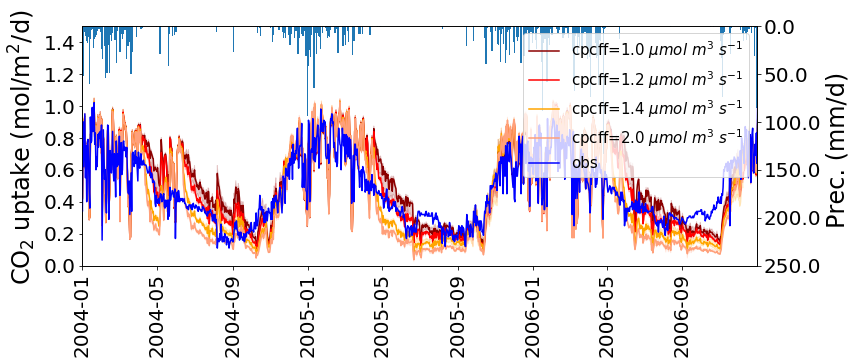

109.8


<Figure size 1280x400 with 0 Axes>

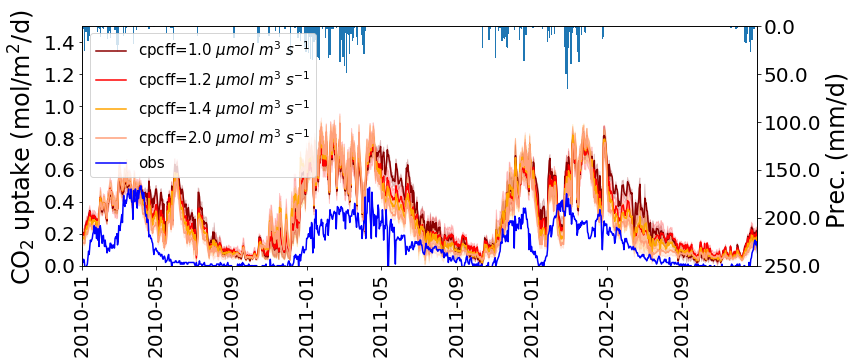

In [40]:
#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]
directory = ["freedrainage_cpcff1.0", 
             "freedrainage_cpcff1.2",
             "freedrainage_cpcff1.4",
             "freedrainage_cpcff2.0",
             "nofreedrainage_cpcff1.0",
             "nofreedrainage_cpcff1.2",
             "nofreedrainage_cpcff1.4",
             "nofreedrainage_cpcff2.0"]

#year to plot per catchment
yearstart = [2007, 2008, 2013, 2004, 2010]
yearend = [2009, 2010, 2015, 2006, 2012] 

colors = ['darkred','red','orange','lightsalmon','green', 'orange' ]
labels = [r'cpcff=1.0 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.2 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.4 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=2.0 $\mu$$mol$ $m^3$ $s^{-1}$' ]
suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
    


#for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
for ibasin in  np.array([ 0, 1, 2, 3, 4 ]):  

    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
    

    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    fig, ax1  = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))        


    
    assbest = best_data[:,19] + best_data[:,20]
    
    #t_emp = pd.to_datetime(emp1[:,0], format="%Y-%m-%d")  


    for irun in range(0,4):   

        exec("best_data = np.genfromtxt('../data/VOM_output/" + 
         basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_best.txt', skip_header=1)") #mm/d
        #load emax
        exec("max_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_max.txt', skiprows = 1)") #mm/d

        exec("min_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_min.txt', skiprows = 1)") #mm/d
        
        assbest = best_data[:,19] + best_data[:,20] 
        assmax_tmp = max_mod[:,19] + max_mod[:,20] 
        assmin_tmp = min_mod[:,19] + min_mod[:,20] 

        ax1.fill_between(tm[0:len(assmax_tmp)], assmax_tmp,  
                         assmin_tmp, color=colors[irun], facecolor=colors[irun], zorder=0, alpha=0.2)

        ax1.plot(tm[0:len(assmax_tmp)], assbest, color=colors[irun], label=labels[irun], zorder=1)

    #ax1.plot(t_emp, -emp1, color='lightgray', label='emp1', zorder=1)
    #ax1.plot(t_emp, -emp2, color='darkgray', label='emp2', zorder=1)
    ax1.plot(to, -gpp_tmp, color='blue', label = 'obs', zorder=1)

    #ax1.set_ylabel('CO2 uptake (mol/m2/d)', size=24  )
    ax1.set_ylabel(r'CO$_{2}$ uptake (mol/m$^2$/d) ', size=24  )

    ax1.set_xlabel('' , size=24   )
    ax1.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin], 12, 31)])
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        tick.label.set_rotation(90)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax1.set_ylim( [0,1.5] )

    
    #add rainfall on top
    ax2 = ax1.twinx()
    #ax2.bar(tm[0:len(assmax_tmp)], -prec[ibasin,0:len(assmax_tmp)], width=1.2)
    ax2.bar(tm[0:len(emax_tmp)], -prec[ibasin,0:len(emax_tmp)], width=2)    
    #ax2.stem(tm[0:len(assmax_tmp)],-prec[ibasin,0:len(assmax_tmp)] ,markerfmt=" ", basefmt=" ")

    ax2.set_ylabel(r'Prec. (mm/d) ', size=24  )
    ax2.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin], 12, 31)])
    print(max(prec[ibasin,0:len(emax_tmp)]))

    #set labels
    max_pre = max(prec[ibasin,:])
    y2_ticks = np.linspace(0, 250, 6)
    y2_ticklabels = [str(i) for i in y2_ticks]
    ax2.set_yticks(-1 * y2_ticks)
    ax2.set_yticklabels(y2_ticklabels, fontsize = 20)
    for tick in ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax2.set_ylim( [-250, 0] )
    
    
    ax1.legend(prop={'size':15})

    ax1.set_zorder(ax1.get_zorder()+1) # put ax in front of ax2
    ax1.patch.set_visible(False)
    
    #fig.suptitle(basin[ibasin], x=0, y=1)
    plt.tight_layout()
    i_site = i_site + 1

    plt.show()


203.4


<Figure size 1280x400 with 0 Axes>

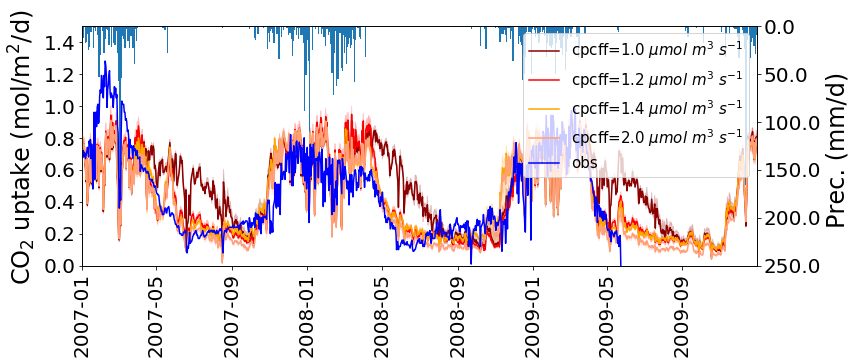

226.3


<Figure size 1280x400 with 0 Axes>

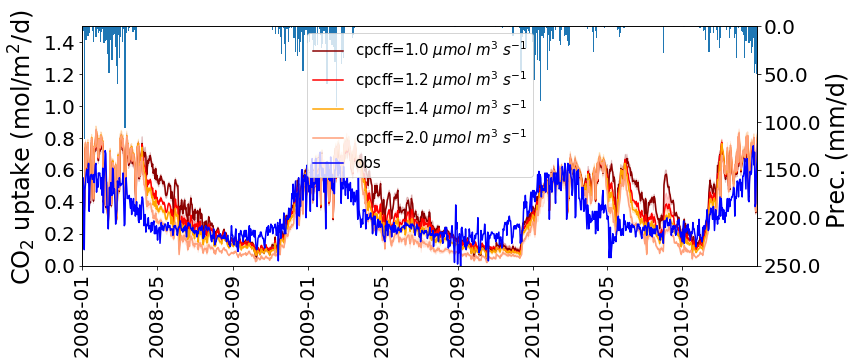

137.5


<Figure size 1280x400 with 0 Axes>

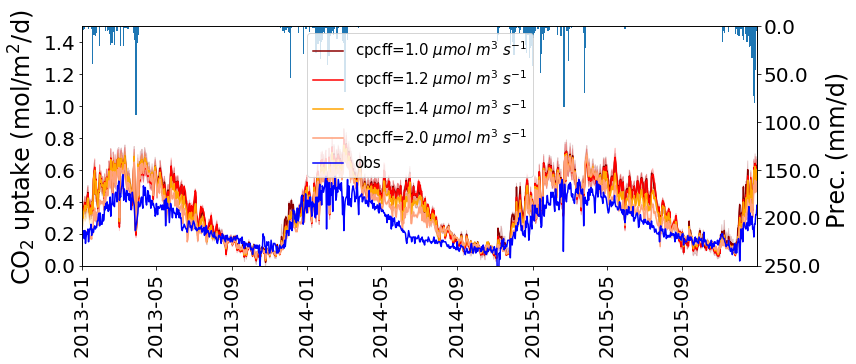

287.5


<Figure size 1280x400 with 0 Axes>

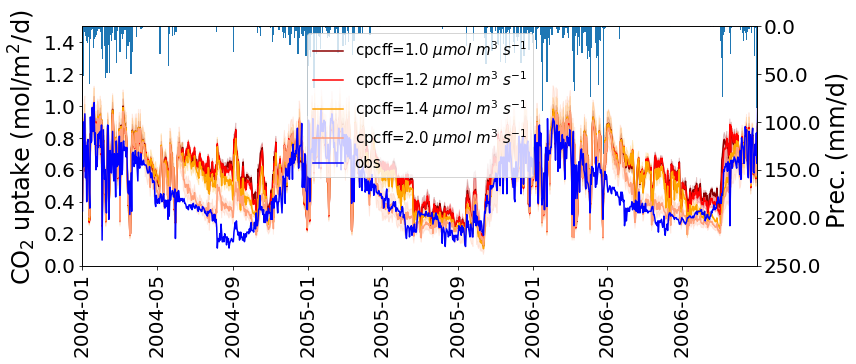

109.8


<Figure size 1280x400 with 0 Axes>

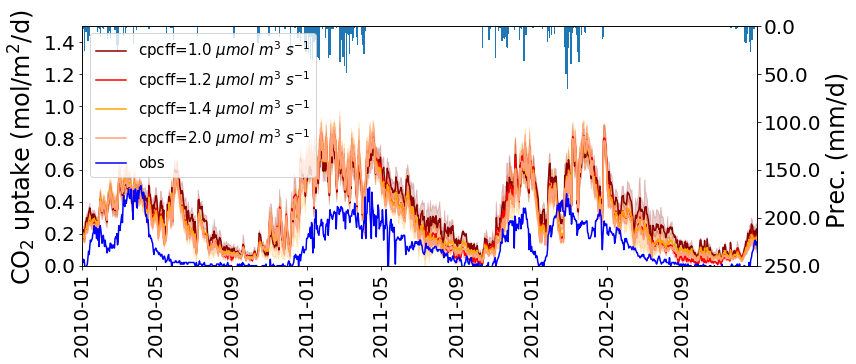

In [41]:
#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]
directory = ["nofreedrainage_cpcff1.0", 
             "nofreedrainage_cpcff1.2",
             "nofreedrainage_cpcff1.4",
             "nofreedrainage_cpcff2.0",
             "nofreedrainage_cpcff1.0",
             "nofreedrainage_cpcff1.2",
             "nofreedrainage_cpcff1.4",
             "nofreedrainage_cpcff2.0"]

#year to plot per catchment
yearstart = [2007, 2008, 2013, 2004, 2010]
yearend = [2009, 2010, 2015, 2006, 2012] 

colors = ['darkred','red','orange','lightsalmon','green', 'orange' ]
labels = [r'cpcff=1.0 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.2 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=1.4 $\mu$$mol$ $m^3$ $s^{-1}$', 
          r'cpcff=2.0 $\mu$$mol$ $m^3$ $s^{-1}$' ]
suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
    


#for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
for ibasin in  np.array([ 0, 1, 2, 3, 4 ]):  

    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
    

    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    fig, ax1  = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))        


    
    assbest = best_data[:,19] + best_data[:,20]
    
    #t_emp = pd.to_datetime(emp1[:,0], format="%Y-%m-%d")  


    for irun in range(0,4):   

        exec("best_data = np.genfromtxt('../data/VOM_output/" + 
         basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_best.txt', skip_header=1)") #mm/d
        #load emax
        exec("max_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_max.txt', skiprows = 1)") #mm/d

        exec("min_mod = np.loadtxt('../data/VOM_output/" + 
             basin[ibasin] + "/" + directory[irun] + "/bestruns/resultsdaily_min.txt', skiprows = 1)") #mm/d
        
        assbest = best_data[:,19] + best_data[:,20] 
        assmax_tmp = max_mod[:,19] + max_mod[:,20] 
        assmin_tmp = min_mod[:,19] + min_mod[:,20] 

        ax1.fill_between(tm[0:len(assmax_tmp)], assmax_tmp,  
                         assmin_tmp, color=colors[irun], facecolor=colors[irun], zorder=0, alpha=0.2)

        ax1.plot(tm[0:len(assmax_tmp)], assbest, color=colors[irun], label=labels[irun], zorder=1)

    #ax1.plot(t_emp, -emp1, color='lightgray', label='emp1', zorder=1)
    #ax1.plot(t_emp, -emp2, color='darkgray', label='emp2', zorder=1)
    ax1.plot(to, -gpp_tmp, color='blue', label = 'obs', zorder=1)

    #ax1.set_ylabel('CO2 uptake (mol/m2/d)', size=24  )
    ax1.set_ylabel(r'CO$_{2}$ uptake (mol/m$^2$/d) ', size=24  )

    ax1.set_xlabel('' , size=24   )
    ax1.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin], 12, 31)])
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        tick.label.set_rotation(90)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax1.set_ylim( [0,1.5] )

    
    #add rainfall on top
    ax2 = ax1.twinx()
    #ax2.bar(tm[0:len(assmax_tmp)], -prec[ibasin,0:len(assmax_tmp)], width=1.2)
    ax2.bar(tm[0:len(emax_tmp)], -prec[ibasin,0:len(emax_tmp)], width=2)    
    #ax2.stem(tm[0:len(assmax_tmp)],-prec[ibasin,0:len(assmax_tmp)] ,markerfmt=" ", basefmt=" ")

    ax2.set_ylabel(r'Prec. (mm/d) ', size=24  )
    ax2.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin], 12, 31)])
    print(max(prec[ibasin,0:len(emax_tmp)]))

    #set labels
    max_pre = max(prec[ibasin,:])
    y2_ticks = np.linspace(0, 250, 6)
    y2_ticklabels = [str(i) for i in y2_ticks]
    ax2.set_yticks(-1 * y2_ticks)
    ax2.set_yticklabels(y2_ticklabels, fontsize = 20)
    for tick in ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax2.set_ylim( [-250, 0] )
    
    
    ax1.legend(prop={'size':15})

    ax1.set_zorder(ax1.get_zorder()+1) # put ax in front of ax2
    ax1.patch.set_visible(False)
    
    #fig.suptitle(basin[ibasin], x=0, y=1)
    plt.tight_layout()
    i_site = i_site + 1

    plt.show()


<Figure size 1280x400 with 0 Axes>

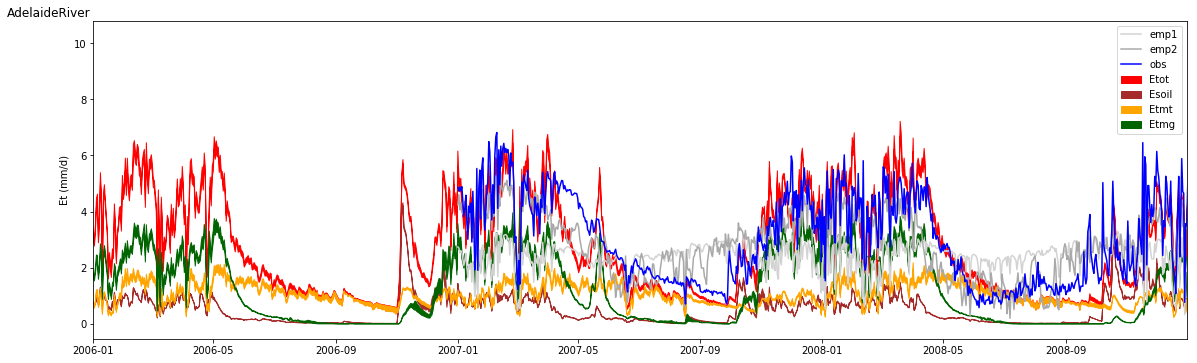

<Figure size 1280x400 with 0 Axes>

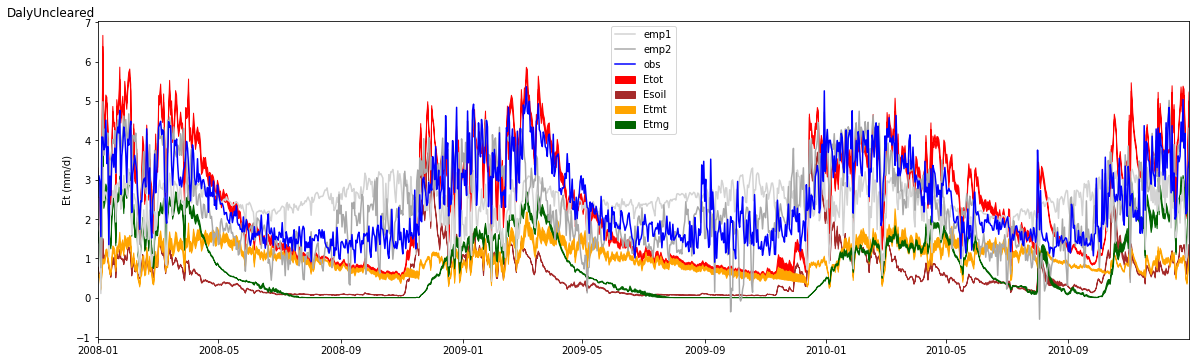

<Figure size 1280x400 with 0 Axes>

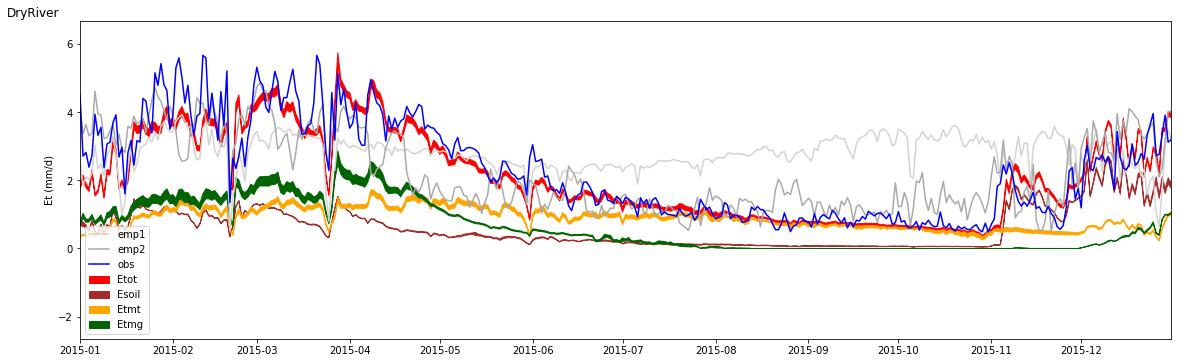

<Figure size 1280x400 with 0 Axes>

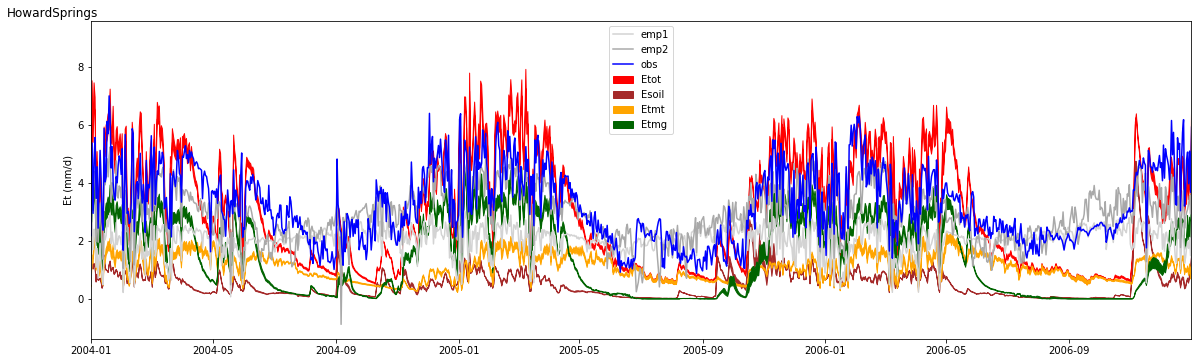

<Figure size 1280x400 with 0 Axes>

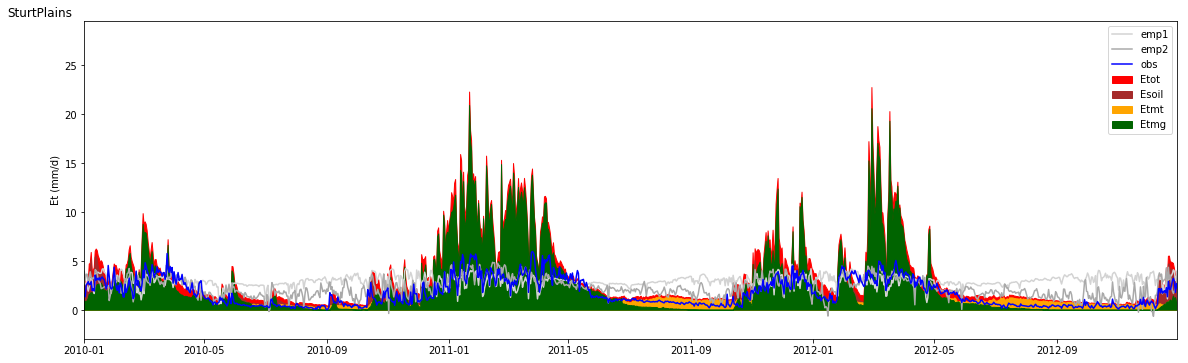

In [8]:
#plot timeseries of evaporation
#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]

#year to plot per catchment
yearstart = [2006, 2008, 2015, 2004, 2010]
yearend = [2008, 2010, 2015, 2006, 2012] 

colors = ['red','red','red','red','green', 'orange' ]
labels = ['mod', '', '', '', 'new data, par. Schymanski et al.(2015)' , 'par. and data Schymanski et al. (2015)']
suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
    


for ibasin in  np.array([ 0, 1, 2, 3, 4 ]):  

    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))        
    
    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    fig, ax0   = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))        

    #get benchmark
    exec("emp1 = np.genfromtxt('../output/" + 
         basin[ibasin] + "/result_freedrainage/ea_emp1.txt', usecols=1, dtype=np.float)") #mm/d 

    exec("emp2 = np.genfromtxt('../output/" + 
         basin[ibasin] + "/result_freedrainage/ea_emp2.txt', usecols=1, dtype=np.float)") #mm/d 
    
    exec("t_emp = np.genfromtxt('../output/" + 
         basin[ibasin] + "/result_freedrainage/ea_emp1.txt', usecols=0, dtype=np.str)") #mm/d 
    t_emp = pd.date_range(t_emp[0], t_emp[-1], freq='D')
    
    for irun in range(0,1):

        #load total
        #load emax
        exec("emax_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/emax" + suffix[irun] + ".txt')") #mm/d

        #load emin
        exec("emin_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/emin" + suffix[irun] + ".txt')") #mm/d
        
        #load esoil
        #load max
        exec("esoil_max_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/esoilmax" + suffix[irun] + ".txt')") #mm/d        
        #load min
        exec("esoil_min_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/esoilmin" + suffix[irun] + ".txt')") #mm/d   
        
        #load etmt
        #load max
        exec("etmt_max_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/etmtmax" + suffix[irun] + ".txt')") #mm/d        
        #load min
        exec("etmt_min_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/etmtmin" + suffix[irun] + ".txt')") #mm/d   
        
        
        #load etmg
        #load max
        exec("etmg_max_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/etmgmax" + suffix[irun] + ".txt')") #mm/d        
        #load min
        exec("etmg_min_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/etmgmin" + suffix[irun] + ".txt')") #mm/d          
        
               
        ax0.fill_between(tm[0:len(emax_tmp)], emax_tmp*1000,  emin_tmp*1000, 
                         facecolor="red", color = "red",label = "Etot" )
        ax0.fill_between(tm[0:len(esoil_max_tmp)], esoil_max_tmp*1000,  esoil_min_tmp*1000, 
                         facecolor="brown", color="brown", label = "Esoil" )
        ax0.fill_between(tm[0:len(etmt_max_tmp)], etmt_max_tmp*1000,  etmt_min_tmp*1000, 
                         facecolor="orange", color="orange", label = "Etmt" )
        ax0.fill_between(tm[0:len(etmg_max_tmp)], etmg_max_tmp*1000,  etmg_min_tmp*1000, 
                         facecolor="darkgreen", color="darkgreen", label = "Etmg" )

        
    ax0.plot(t_emp, emp1, color='lightgray', label='emp1')
    ax0.plot(t_emp, emp2, color='darkgray', label='emp2')

    ax0.plot(to, ea_tmp, color='blue', label='obs')
    ax0.set(ylabel = 'Et (mm/d)', xlabel = '' )
    ax0.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin] ,12, 31)])  
    ax0.legend()

 
    fig.suptitle(basin[ibasin], x=0, y=1)
    plt.tight_layout()
    i_site = i_site + 1

plt.show()







No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1280x400 with 0 Axes>

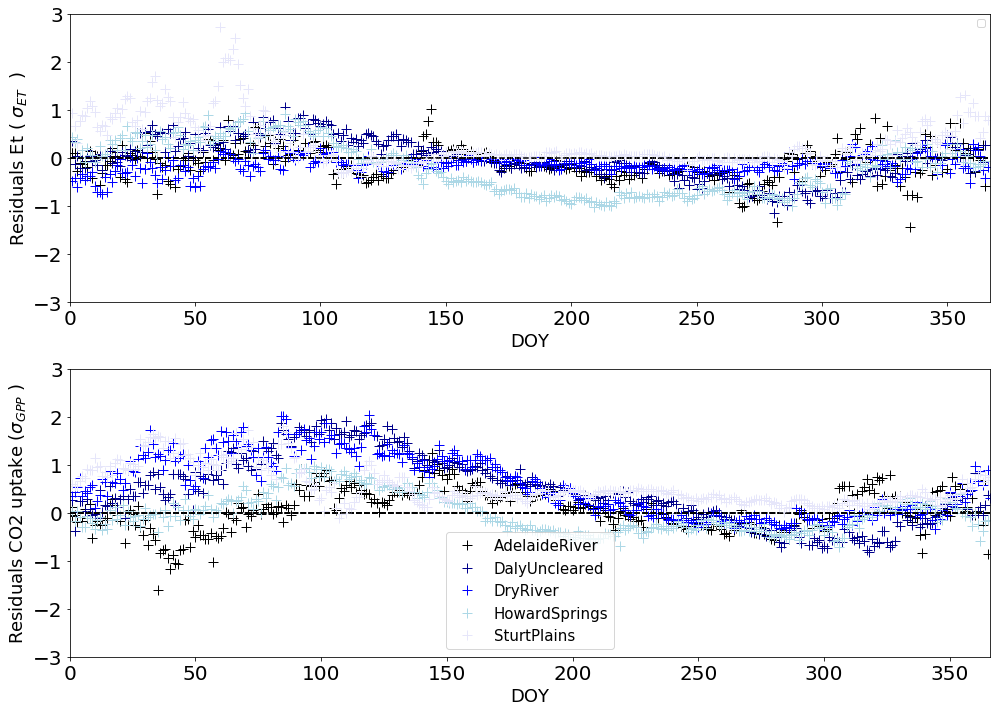

In [9]:
#residuals

#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]

#year to plot per catchment
yearstart = [2006, 2008, 2015, 2004, 2010]
yearend = [2008, 2010, 2017, 2006, 2012] 



colors = ['red','red','red','red','green', 'orange' ]
labels = ['mod', '', '', '', 'new data, par. Schymanski et al.(2015)' , 'par. and data Schymanski et al. (2015)']
suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
colors = [ 'black', 'darkblue', 'blue', 'lightblue', 'lavender'   ]


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k', )
fig, ((ax0, ax1))  = plt.subplots(nrows=2, ncols=1, figsize=(14, 10)) 

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  

    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
       
    for irun in range(0,1):

        #load residuals
        exec("res_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + "_res.txt')") #mm/d
        
        #load dates
        exec("dates_overlap = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/dates_overlap.txt')") #mm/d
        tm_overlap = pd.date_range(datetime(int(dates_overlap[0,2]),int(dates_overlap[0,1]),int(dates_overlap[0,0])), 
                  datetime(int(dates_overlap[-1,2]),int(dates_overlap[-1,1]),int(dates_overlap[-1,0])), 
                  freq='D'  )
        
        #ax0.plot(tm_overlap.dayofyear, res_tmp[0,0:len(tm_overlap.dayofyear)], '*', color = colors[ibasin], label = basin[ibasin])
        #for isim in range(1, len(res_tmp[:,0])):            
        #ax0.plot(tm_overlap.dayofyear, res_tmp[0,0:len(tm_overlap.dayofyear)], '+', color = colors[ibasin])
        #ax0.plot(tm_overlap.dayofyear, res_tmp[99,0:len(tm_overlap.dayofyear)], '.', color = colors[ibasin])
        for iday in range(0,366):
            tmp = res_tmp[0,0:len(tm_overlap.dayofyear)]
            ax0.plot(tm_overlap.dayofyear[iday], np.mean(tmp[tm_overlap.dayofyear == tm_overlap.dayofyear[iday]]), '+', color = colors[ibasin], markersize=10)
        
    #ax0.set(ylabel = r'Residuals Et ( $\sigma_{ET} $  )', xlabel = '' )
    #ax0.set_xlim([datetime(year[ibasin],1, 1), datetime( year[ibasin] ,12, 31)])  
    ax0.set_ylim([ -3, 3 ])
    ax0.plot([0,366],[0,0], '--', color='black')
    ax0.set_xlim([ 0, 367 ])  
    
    ax0.set_ylabel(r'Residuals Et ( $\sigma_{ET} $  )', size=18  )

    ax0.set_xlabel('DOY' , size=18   )
    
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.legend(prop={'size':15})
       
    
    
    ax0.legend()

    for irun in range(0,1):

        #load residuals
        exec("res_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_res.txt')") #mm/d
        
        #load dates
        exec("dates_overlap = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/dates_overlap.txt')") #mm/d
        tm_overlap = pd.date_range(datetime(int(dates_overlap[0,2]),int(dates_overlap[0,1]),int(dates_overlap[0,0])), 
                  datetime(int(dates_overlap[-1,2]),int(dates_overlap[-1,1]),int(dates_overlap[-1,0])), 
                  freq='D')
            
        #ax1.plot(tm_overlap.dayofyear, res_tmp[0,0:len(tm_overlap.dayofyear)], '*', color = colors[ibasin], label = basin[ibasin])

        #for isim in range(1, len(res_tmp[:,0])):
        ax1.plot(tm_overlap.dayofyear[0], np.mean(tmp[tm_overlap.dayofyear == tm_overlap.dayofyear[0]]), '+', color = colors[ibasin], label=basin[ibasin], markersize=10)

        for iday in range(1,366):
            tmp = res_tmp[0,0:len(tm_overlap.dayofyear)]
            ax1.plot(tm_overlap.dayofyear[iday], np.mean(tmp[tm_overlap.dayofyear == tm_overlap.dayofyear[iday]]), '+', color = colors[ibasin], markersize=10)
        #ax1.plot(tm_overlap.dayofyear, res_tmp[99,0:len(tm_overlap.dayofyear)], '.', color = colors[ibasin])
    ax1.plot([0,367],[0,0], '--', color='black')

    #ax1.set(ylabel = r'Residuals CO2 uptake ($\sigma_{GPP} $ )', xlabel = '' )
    ax1.set_ylim([ -3, 3 ])  
    ax1.set_xlim([ 0, 366 ])  
    
    ax1.set_ylabel(r'Residuals CO2 uptake ($\sigma_{GPP} $ )', size=18  )
    ax1.set_xlabel('DOY' , size=18   )
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax1.legend(prop={'size':15})
        

    #fig.suptitle(basin[ibasin], x=0, y=1)
plt.tight_layout()

plt.show()



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 1280x400 with 0 Axes>

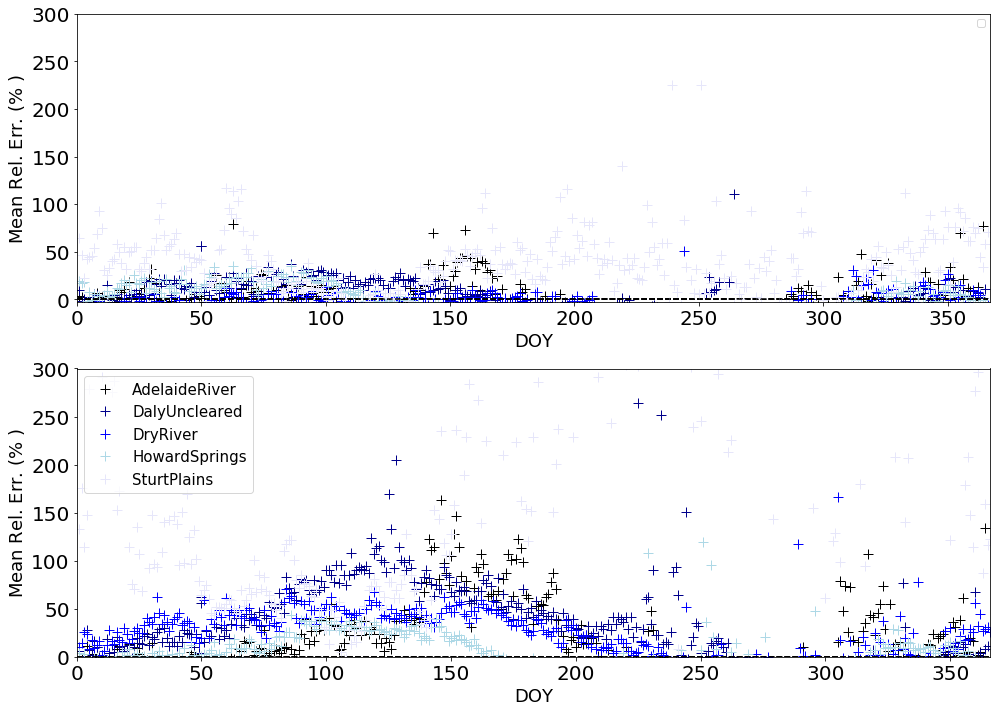

In [10]:
#residuals

#make plots uncertainty e and ass
#random year, each run differnt coloured envelope
#2 columns, e and ass
#5 rows, catchmentsa
#compare with flux towers

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]

#year to plot per catchment
yearstart = [2006, 2008, 2015, 2004, 2010]
yearend = [2008, 2010, 2017, 2006, 2012] 



colors = ['red','red','red','red','green', 'orange' ]
labels = ['mod', '', '', '', 'new data, par. Schymanski et al.(2015)' , 'par. and data Schymanski et al. (2015)']
suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
colors = [ 'black', 'darkblue', 'blue', 'lightblue', 'lavender'   ]


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k', )
fig, ((ax0, ax1))  = plt.subplots(nrows=2, ncols=1, figsize=(14, 10)) 

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  

    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
       
    for irun in range(0,1):

        #load residuals
        exec("res_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + "_relerr.txt')") #mm/d
        
        #load dates
        exec("dates_overlap = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/dates_overlap.txt')") #mm/d
        tm_overlap = pd.date_range(datetime(int(dates_overlap[0,2]),int(dates_overlap[0,1]),int(dates_overlap[0,0])), 
                  datetime(int(dates_overlap[-1,2]),int(dates_overlap[-1,1]),int(dates_overlap[-1,0])), 
                  freq='D'  )
        
        #ax0.plot(tm_overlap.dayofyear, res_tmp[0,0:len(tm_overlap.dayofyear)], '*', color = colors[ibasin], label = basin[ibasin])
        #for isim in range(1, len(res_tmp[:,0])):            
        #ax0.plot(tm_overlap.dayofyear, res_tmp[0,0:len(tm_overlap.dayofyear)], '+', color = colors[ibasin])
        #ax0.plot(tm_overlap.dayofyear, res_tmp[99,0:len(tm_overlap.dayofyear)], '.', color = colors[ibasin])
        for iday in range(0,366):
            tmp = res_tmp[0,0:len(tm_overlap.dayofyear)]
            ax0.plot(tm_overlap.dayofyear[iday], 100*np.mean(tmp[tm_overlap.dayofyear == tm_overlap.dayofyear[iday]]), '+', color = colors[ibasin], markersize=10)
        
    #ax0.set(ylabel = r'Residuals Et ( $\sigma_{ET} $  )', xlabel = '' )
    #ax0.set_xlim([datetime(year[ibasin],1, 1), datetime( year[ibasin] ,12, 31)])  
    ax0.set_ylim([ -3, 300 ])
    ax0.plot([0,366],[0,0], '--', color='black')
    ax0.set_xlim([ 0, 367 ])  
    
    #ax0.set_ylabel(r'Residuals Et ( $\sigma_{ET} $  )', size=18  )
    ax0.set_ylabel(r'Mean Rel. Err. ($\%} $ )', size=18  )

    ax0.set_xlabel('DOY' , size=18   )
    
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.legend(prop={'size':15})
       
    
    
    ax0.legend()

    for irun in range(0,1):

        #load residuals
        exec("res_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_relerr.txt')") #mm/d
        
        #load dates
        exec("dates_overlap = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/dates_overlap.txt')") #mm/d
        tm_overlap = pd.date_range(datetime(int(dates_overlap[0,2]),int(dates_overlap[0,1]),int(dates_overlap[0,0])), 
                  datetime(int(dates_overlap[-1,2]),int(dates_overlap[-1,1]),int(dates_overlap[-1,0])), 
                  freq='D')
            
        #ax1.plot(tm_overlap.dayofyear, res_tmp[0,0:len(tm_overlap.dayofyear)], '*', color = colors[ibasin], label = basin[ibasin])

        #for isim in range(1, len(res_tmp[:,0])):
        ax1.plot(tm_overlap.dayofyear[0], 100*np.mean(tmp[tm_overlap.dayofyear == tm_overlap.dayofyear[0]]), '+', color = colors[ibasin], label=basin[ibasin], markersize=10)

        for iday in range(1,366):
            tmp = res_tmp[0,0:len(tm_overlap.dayofyear)]
            ax1.plot(tm_overlap.dayofyear[iday],100*np.mean(tmp[tm_overlap.dayofyear == tm_overlap.dayofyear[iday]]), '+', color = colors[ibasin], markersize=10)
        #ax1.plot(tm_overlap.dayofyear, res_tmp[99,0:len(tm_overlap.dayofyear)], '.', color = colors[ibasin])
    ax1.plot([0,367],[0,0], '--', color='black')

    #ax1.set(ylabel = r'Residuals CO2 uptake ($\sigma_{GPP} $ )', xlabel = '' )
    ax1.set_ylim([0 , 300 ])  
    ax1.set_xlim([ 0, 366 ])  
    
    ax1.set_ylabel(r'Mean Rel. Err. ($\%} $ )', size=18  )
    ax1.set_xlabel('DOY' , size=18   )
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax1.legend(prop={'size':15})
        

    #fig.suptitle(basin[ibasin], x=0, y=1)
plt.tight_layout()

plt.show()



No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, 

/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: Runtim

/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: Runtim

/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: Runtim

/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
No handles with labels found to put in legend.


<Figure size 1280x400 with 0 Axes>

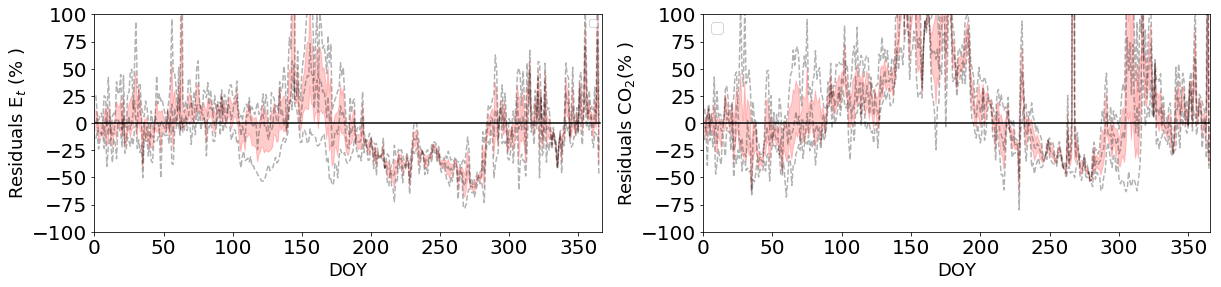

<Figure size 1280x400 with 0 Axes>

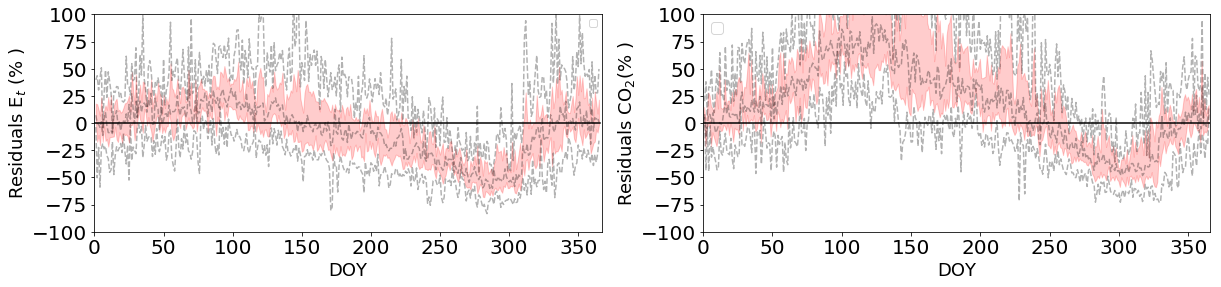

<Figure size 1280x400 with 0 Axes>

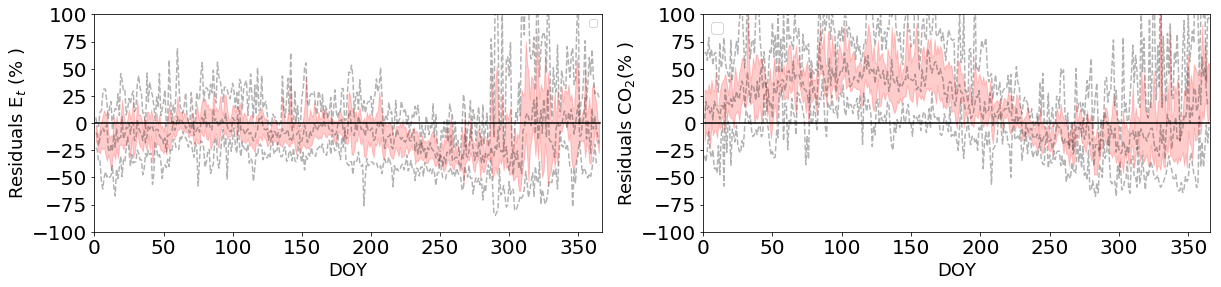

<Figure size 1280x400 with 0 Axes>

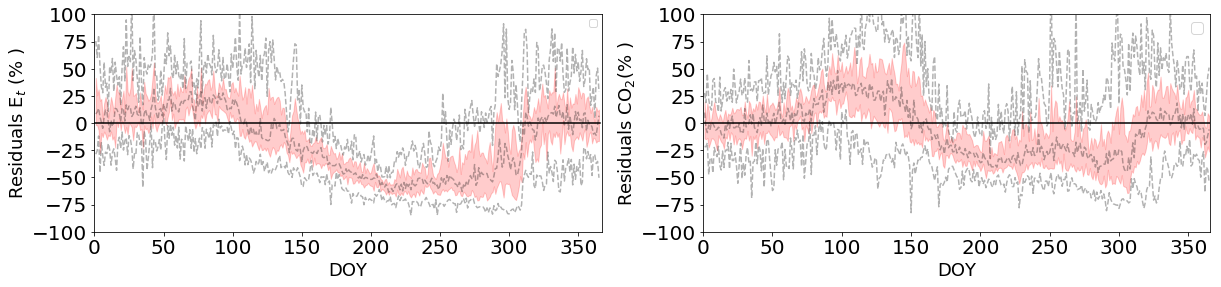

<Figure size 1280x400 with 0 Axes>

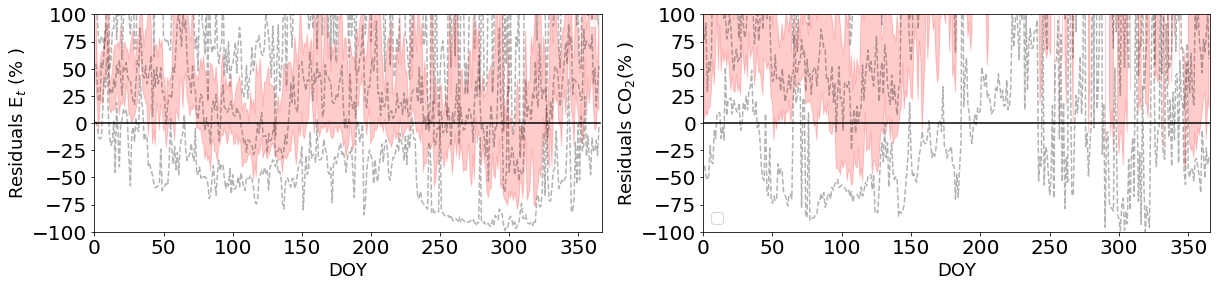

In [11]:
#residuals
# plot residuals in percentage (so rel. deviation for each day) for the best solution as a boxplot


i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]

#year to plot per catchment
yearstart = [2006, 2008, 2015, 2004, 2010]
yearend = [2008, 2010, 2017, 2006, 2012] 



colors = ['red','red','red','red','green', 'orange' ]
labels = ['mod', '', '', '', 'new data, par. Schymanski et al.(2015)' , 'par. and data Schymanski et al. (2015)']
suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
colors = [ 'black', 'darkblue', 'blue', 'lightblue', 'lavender'   ]




for ibasin in  np.array([0, 1, 2, 3, 4 ]):  

    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k', )
    fig, ((ax0, ax1))  = plt.subplots(nrows=1, ncols=2, figsize=(20, 4)) 
    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
       
    for irun in range(0,1):

        #load residuals
        exec("res_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + "_relerr.txt')") #mm/d
        
        #load dates
        exec("dates_overlap = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/dates_overlap.txt')") #mm/d
        tm_overlap = pd.date_range(datetime(int(dates_overlap[0,2]),int(dates_overlap[0,1]),int(dates_overlap[0,0])), 
                  datetime(int(dates_overlap[-1,2]),int(dates_overlap[-1,1]),int(dates_overlap[-1,0])), 
                  freq='D'  )
        
        #use boxplot to derive bounds of percentiles
        box_data = np.zeros([5, 366])
        for iday in range(0,366):
            tmp = res_tmp[0,0:len(tm_overlap.dayofyear)]
            box_tmp = plt.boxplot(100*tmp[tm_overlap.dayofyear == iday], positions = [-10])
            whiskers_tmp = [item.get_ydata() for item in box_tmp['whiskers']]
            median_tmp = [item.get_ydata() for item in box_tmp['medians']]
            
            #save in array
            box_data[0,iday] = whiskers_tmp[1][1]
            box_data[1,iday] = whiskers_tmp[1][0]
            box_data[2,iday] = median_tmp[0][0]
            box_data[3,iday] = whiskers_tmp[0][0]
            box_data[4,iday] = whiskers_tmp[0][1]

            
    #plot 'whiskers'
    ax0.plot(range(0,366),box_data[0,:], '--', color='black', alpha=0.3)
    ax0.plot(range(0,366),box_data[2,:], '--', color='black', alpha=0.3)
    ax0.plot(range(0,366),box_data[4,:], '--', color='black', alpha=0.3)
    ax0.plot( [0,366],[0,0] , color='black')

    #plot 'box'
    ax0.fill_between(range(0,366), box_data[1,:],  
                         box_data[3,:], color='red', facecolor='red', zorder=0, alpha=0.2)
    
    ax0.set_ylim([ -100, 100 ])
    ax0.set_xlim([ 0, 367 ])  
    
    #ax0.set_ylabel(r'Residuals Et ( $\sigma_{ET} $  )', size=18  )
    ax0.set_ylabel(r'Residuals E$_t$ ($\%} $ )', size=18  )

    ax0.set_xlabel('DOY' , size=18   )
    
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.legend(prop={'size':15})
       
    
    
    ax0.legend()

    for irun in range(0,1):

        #load residuals
        exec("res_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_relerr.txt')") #mm/d
        
        #load dates
        exec("dates_overlap = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/dates_overlap.txt')") #mm/d
        tm_overlap = pd.date_range(datetime(int(dates_overlap[0,2]),int(dates_overlap[0,1]),int(dates_overlap[0,0])), 
                  datetime(int(dates_overlap[-1,2]),int(dates_overlap[-1,1]),int(dates_overlap[-1,0])), 
                  freq='D')
            
        #use boxplot to derive bounds of percentiles
        box_data = np.zeros([5, 366])
        for iday in range(0,366):
            tmp = res_tmp[0,0:len(tm_overlap.dayofyear)]
            box_tmp = plt.boxplot(100*tmp[tm_overlap.dayofyear == iday],  positions = [-10])
            whiskers_tmp = [item.get_ydata() for item in box_tmp['whiskers']]
            median_tmp = [item.get_ydata() for item in box_tmp['medians']]
            
            #save in array
            box_data[0,iday] = whiskers_tmp[1][1]
            box_data[1,iday] = whiskers_tmp[1][0]
            box_data[2,iday] = median_tmp[0][0]
            box_data[3,iday] = whiskers_tmp[0][0]
            box_data[4,iday] = whiskers_tmp[0][1]

    #plot 'whiskers'
    ax1.plot(range(0,366),box_data[0,:], '--', color='black', alpha=0.3)
    ax1.plot(range(0,366),box_data[2,:], '--', color='black', alpha=0.3)
    ax1.plot(range(0,366),box_data[4,:], '--', color='black', alpha=0.3)
    ax1.plot( [0,366],[0,0] , color='black')

    #plot 'box'
    ax1.fill_between(range(0,366), box_data[1,:],  
                         box_data[3,:], color='red', facecolor='red', zorder=0, alpha=0.2)
 
    #ax1.set(ylabel = r'Residuals CO2 uptake ($\sigma_{GPP} $ )', xlabel = '' )
    ax1.set_ylim([-100 , 100 ])  
    ax1.set_xlim([ 0, 366 ])  
    
    ax1.set_ylabel(r'Residuals CO$_2$($\%} $ )', size=18  )
    ax1.set_xlabel('DOY' , size=18   )
    #ax1.set_xticks( ticks = np.linspace(0,350,6), labels = np.linspace(0,350,6)  )  
    
    ax1.set_xticks( [0,50, 100, 150, 200, 250, 300, 350] )  
    ax1.set_xticklabels( [0,50, 100, 150, 200, 250, 300, 350], size=20  )  
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax1.legend(prop={'size':15})
        

    #fig.suptitle(basin[ibasin], x=0, y=1)
#plt.tight_layout()

plt.show()



In [12]:
#load best series

best_e = np.zeros([5, 3650])
best_ass = np.zeros([5, 3650])


for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
    for irun in range(0,1):

        #load emin
        exec("e_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + ".txt')") #mm/d
        exec("ass_tmp = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + ".txt')") #mm/d

        
        best_e[ibasin,:] = e_tmp[0,-3650:]
        best_ass[ibasin,:] = ass_tmp[0,-3650:]

        

/home/remko/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/remko/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.
/home/remko/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/remko/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/remko/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/remko/.local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found 

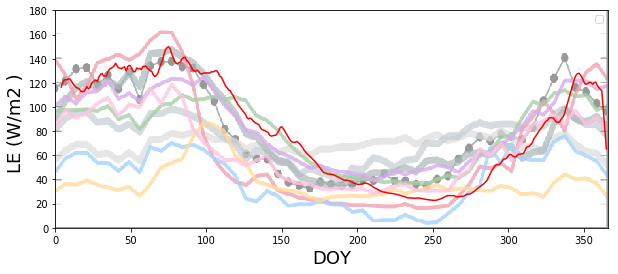

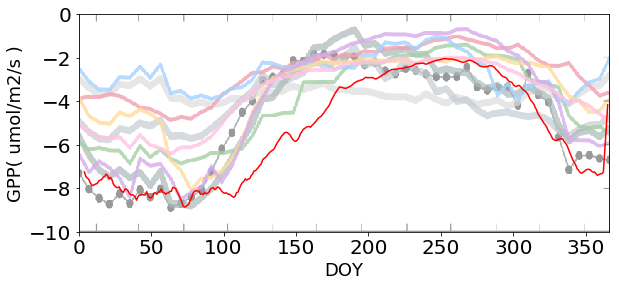

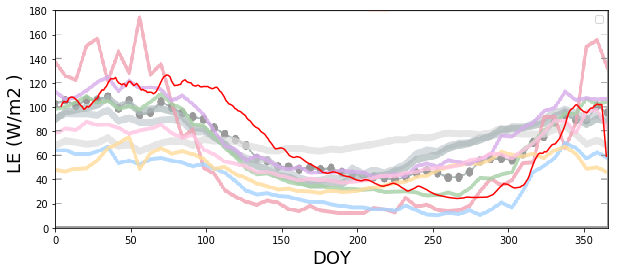

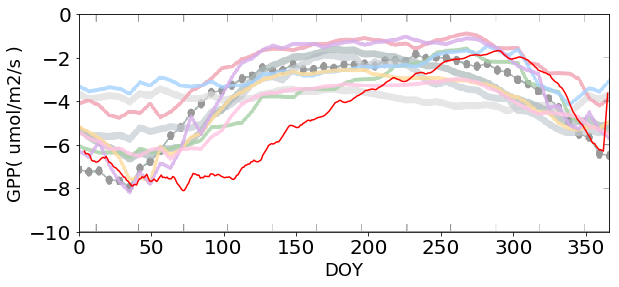

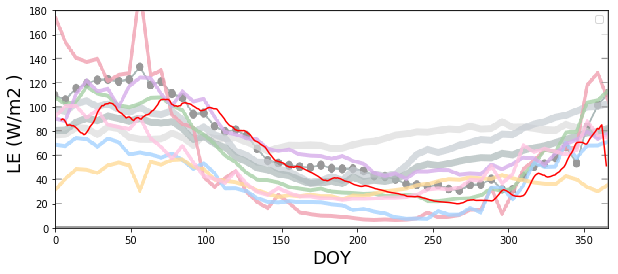

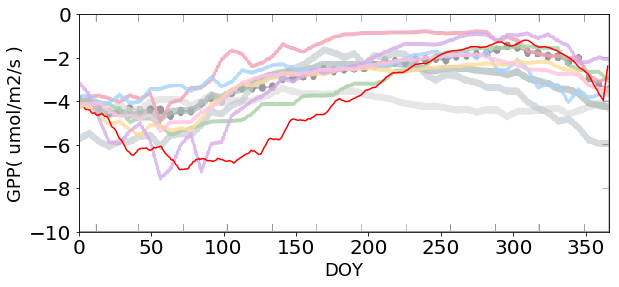

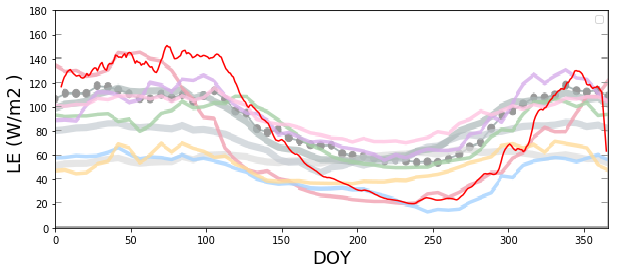

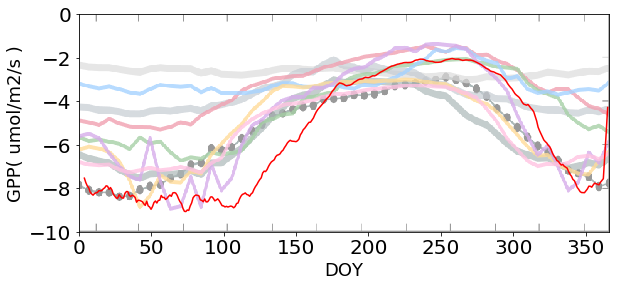

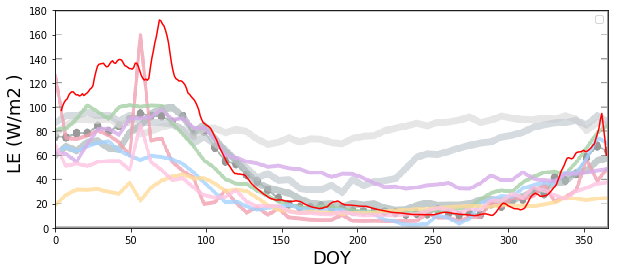

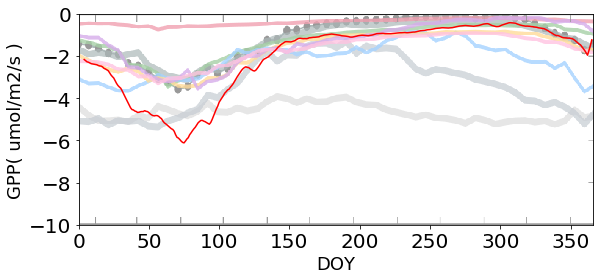

In [13]:
#ensemble year

i_site = 0
basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]

#year to plot per catchment
yearstart = [2006, 2008, 2015, 2004, 2010]
yearend = [2008, 2010, 2017, 2006, 2012] 

const = 2.16679         #[g*K/J]
lat_heat_vapor = 2.45   #[MJ/kg] 
rho_w = 997             #[kg/m3]
CO2MW = 44.01           #[g/mol]
R = 8.314               #[J/mol/K]
atm_press = 1023.25     #[hPa]
std_tmp = 25.0          #[oC]
temp_conv = 273.15      #[K]


colors = ['red','red','red','red','green', 'orange' ]
labels = ['mod', '', '', '', 'new data, par. Schymanski et al.(2015)' , 'par. and data Schymanski et al. (2015)']
suffix = ['1', '2', '3', '4', '5', '6' ]

ibasin = 3
    
colors = [ 'black', 'darkblue', 'blue', 'lightblue', 'lavender'   ]




for ibasin in  np.array([0, 1, 2, 3, 4 ]):  

    #fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k' )
    fig, ax0   = plt.subplots(nrows=1, ncols=1, figsize=(12, 4) ) 
    
    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
    exec( "ea_tmp = ea" + str(ibasin))    
    exec( "gpp_tmp = gpp" + str(ibasin))   
       
        
    img = imread('graphs_whitley/' + basin[ibasin] + '_LE.png')
        
        
    for irun in range(0,1):

        #load emin
       # exec("e_tmp = np.loadtxt('../output/" + 
       #      basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + ".txt')") #mm/d

        
        tmod = pd.date_range(datetime(int(data_daly[0,3]),int(data_daly[0,2]),int(data_daly[0,1])), 
                  datetime(int(data_daly[-1,3]),int(data_daly[-1,2]),int(data_daly[-1,1])), 
                  freq='D')
        

        e_ens = np.zeros([366])
        le_ens = np.zeros([366])
        tmp = best_e[ibasin,:]
        DOY = tmod.dayofyear[0:len(tmp)] 
        DOY = DOY[-3650:]
        for iday in range(0,366):
            e_ens[iday] = np.mean( tmp[DOY == iday]  ) * 1000 #mm/d
            le_ens[iday] = e_ens[iday]  * lat_heat_vapor * rho_w * 1000/(3600*24)
            #ax0.plot(tm_overlap.dayofyear[iday], 100*np.mean(tmp[tm_overlap.dayofyear == tm_overlap.dayofyear[iday]]), '+', color = colors[ibasin], markersize=10)
        
        #7-day running mean
        N = 7
        le7d = np.convolve(le_ens, np.ones((N,))/N, mode='same')
        
    ax0.imshow(img , extent=[0, 366, 0.0, 180], alpha=0.4, aspect='auto' )
        
    ax0.plot(range(0,366), le7d, color='red'  )
    #ax0.set(ylabel = r'Residuals Et ( $\sigma_{ET} $  )', xlabel = '' )
    #ax0.set_xlim([datetime(year[ibasin],1, 1), datetime( year[ibasin] ,12, 31)])  
    ax0.set_ylim([ 0, 180 ])
    ax0.set_xlim([ 0, 366 ])  
    ax0.set_aspect(0.8)
    #ax0.set_ylabel(r'Residuals Et ( $\sigma_{ET} $  )', size=18  )
    ax0.set_ylabel('LE (W/m2 ) ', size=18  )

    ax0.set_xlabel('DOY' , size=18   )
    
    #for tick in ax0.xaxis.get_major_ticks():
   #     tick.label.set_fontsize(20)
   # for tick in ax0.yaxis.get_major_ticks():
   #     tick.label.set_fontsize(20)
    #ax0.legend(prop={'size':15})
    
    
    ax0.legend()

    img = imread('graphs_whitley/' + basin[ibasin] + '_GPP.png')

    
    for irun in range(0,1):

        #load emin
        #exec("ass_tmp = np.loadtxt('../output/" + 
        #     basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + ".txt')") #mm/d
            
        ass_ens = np.zeros([366])
        tmp = best_ass[ibasin,:]
        DOY = tmod.dayofyear[0:len(tmp)] 
        DOY = DOY[-3650:]
        for iday in range(0,366):
            ass_ens[iday] = -1000000*np.mean( tmp[DOY == iday]  ) / (3600*24)

        #7-day running mean
        N = 7
        ass7d = np.convolve(ass_ens, np.ones((N,))/N, mode='same')
        
    fig, ax1   = plt.subplots(nrows=1, ncols=1, figsize=(12, 4) ) 

    ax1.imshow(img , extent=[0, 366, -10, 0], alpha=0.4, aspect='auto' )    
    ax1.plot(range(0,366), ass7d, color='red'  )

    #ax1.set(ylabel = r'Residuals CO2 uptake ($\sigma_{GPP} $ )', xlabel = '' )
    ax1.set_ylim([-10 , 0 ])  
    ax1.set_xlim([ 0, 366 ])  
    ax1.set_aspect(15)

    ax1.set_ylabel( 'GPP( umol/m2/s )', size=18  )
    ax1.set_xlabel('DOY' , size=18   )
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    #ax1.legend(prop={'size':15})
        

    #fig.suptitle(basin[ibasin], x=0, y=1)
plt.tight_layout()
#plt.subplots_adjust(hspace=.0)
plt.show()









<Figure size 1280x400 with 0 Axes>

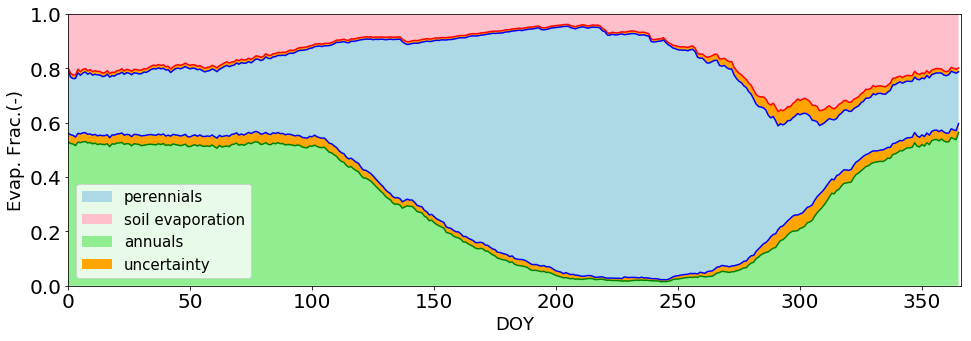

<Figure size 1280x400 with 0 Axes>

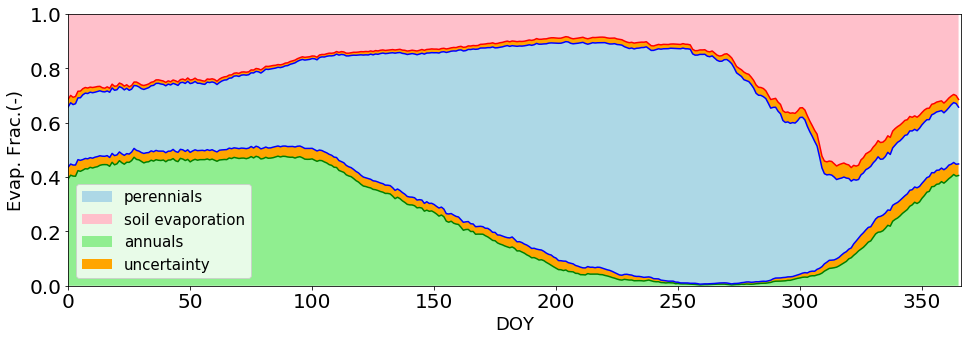

<Figure size 1280x400 with 0 Axes>

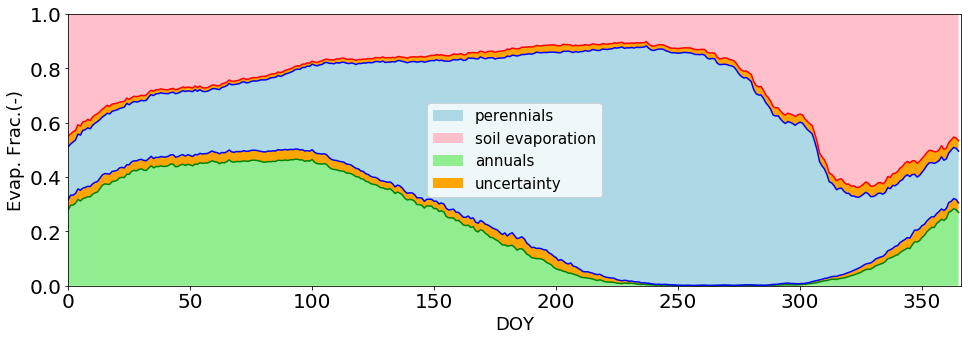

<Figure size 1280x400 with 0 Axes>

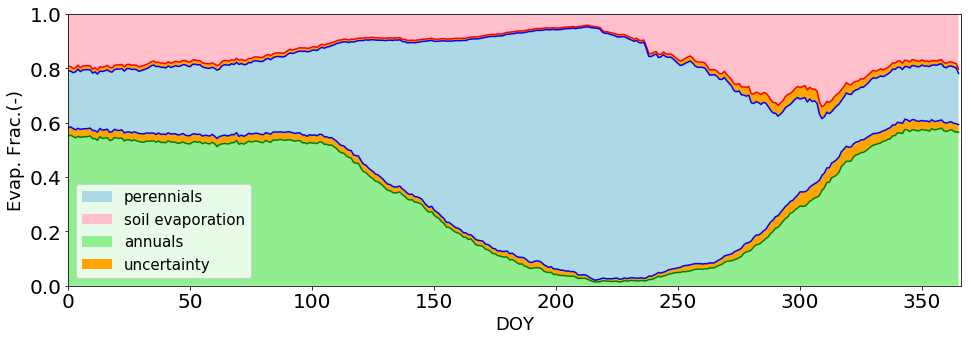

<Figure size 1280x400 with 0 Axes>

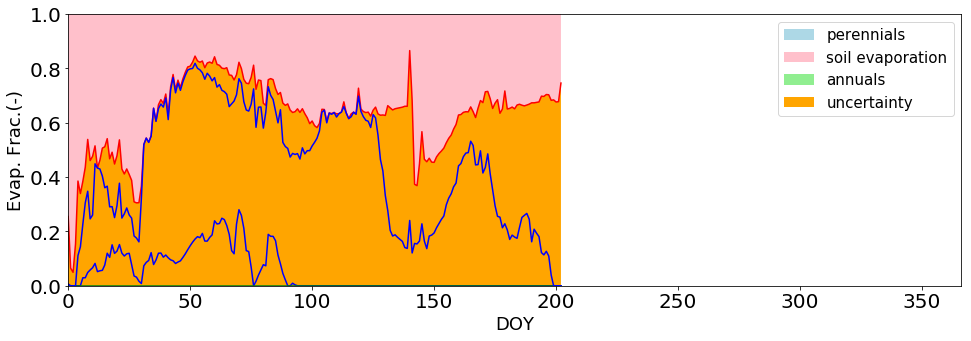

In [14]:
#plot fractions of vegetation transpiration over soil evaporation




#for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
for ibasin in  np.array([0, 1, 2, 3, 4 ]):  


    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    fig, ax0  = plt.subplots(nrows=1, ncols=1, figsize=(16, 5)) 
       
    for irun in range(0,1):
        
        exec("efrac_max = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/efrac_max.txt')") #mm/d
        exec("efrac_min = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/efrac_min.txt')") #mm/d

        exec("efrac_maxg = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/efrac_maxg.txt')") #mm/d
        exec("efrac_ming = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/efrac_ming.txt')") #mm/d
        
        
    ax0.plot(range(0,366), efrac_max, color = 'red')
    ax0.plot(range(0,366), efrac_min, color = 'blue')
    ax0.plot(range(0,366), efrac_ming, color = 'green')
    ax0.plot(range(0,366), efrac_maxg, color = 'blue')


    ax0.fill_between(range(0,366), efrac_min,  
                         efrac_maxg, facecolor='lightblue', label = 'perennials')
    ax0.fill_between(range(0,366), np.ones((366)), efrac_max,  
                         facecolor='pink', label =  'soil evaporation' )
    ax0.fill_between(range(0,366), efrac_ming, np.zeros((366)), 
                         facecolor='lightgreen', label = 'annuals')
    
    
    ax0.fill_between(range(0,366), efrac_max, efrac_min, 
                         facecolor='orange', label = 'uncertainty')
    ax0.fill_between(range(0,366), efrac_maxg, efrac_ming, 
                         facecolor='orange')
    ax0.set_ylim(0,1)
    ax0.set_xlim(0,366)

    #ax0.set(ylabel = 'Eav. Frac.(-)', xlabel = 'DOY' )
    #ax0.legend()
    
    ax0.set_ylabel('Evap. Frac.(-)', size=18  )
    ax0.set_xlabel('DOY' , size=18   )
    
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.legend(prop={'size':15})
    
    
    
    
    
    #fig.suptitle(basin[ibasin], x=0.15, y=1)





<Figure size 1280x400 with 0 Axes>

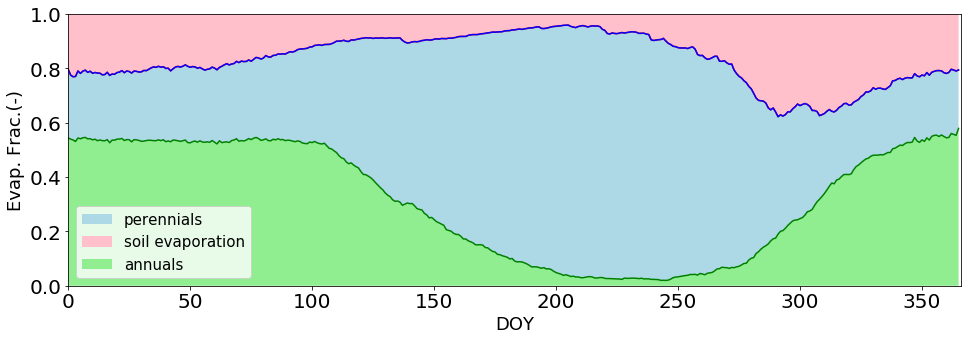

<Figure size 1280x400 with 0 Axes>

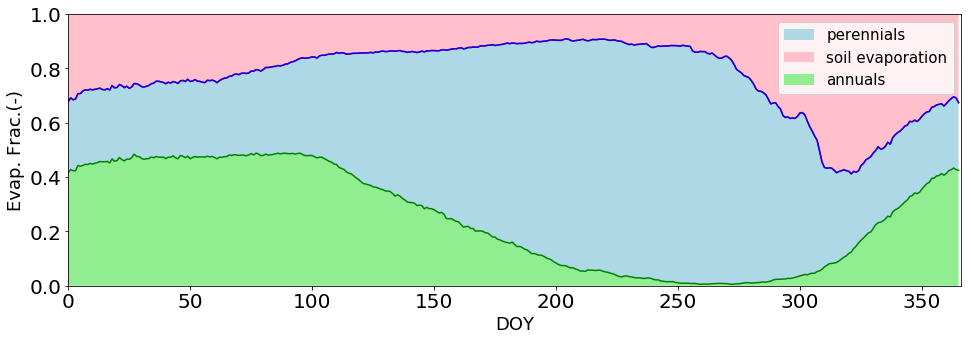

<Figure size 1280x400 with 0 Axes>

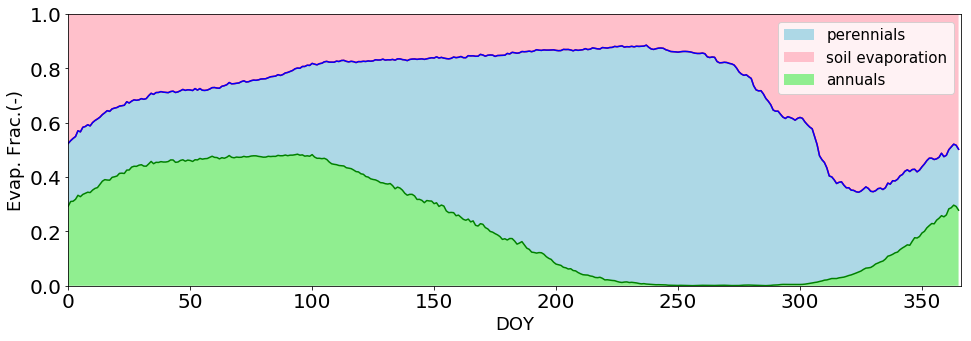

<Figure size 1280x400 with 0 Axes>

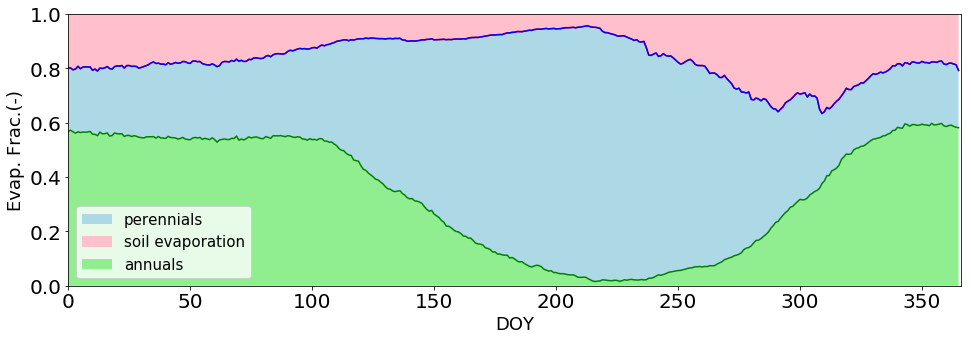

<Figure size 1280x400 with 0 Axes>

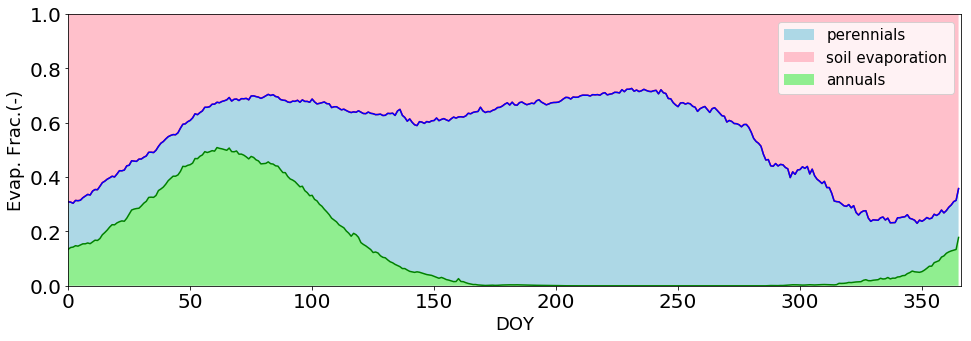

In [15]:
#plot fractions of vegetation transpiration over soil evaporation




#for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
for ibasin in  np.array([0, 1, 2, 3, 4 ]):  


    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    fig, ax0  = plt.subplots(nrows=1, ncols=1, figsize=(16, 5)) 
       
    for irun in range(0,1):
        
        exec("efrac_tot = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/efrac_best.txt')") #mm/d
        exec("efrac_g = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/efrac_bestg.txt')") #mm/d
        exec("efrac_t = np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/efrac_bestt.txt')") #mm/d
        
        
    ax0.plot(range(0,366), efrac_tot, color = 'red')
    ax0.plot(range(0,366), efrac_g + efrac_t, color = 'blue')
    ax0.plot(range(0,366), efrac_g, color = 'green')


    ax0.fill_between(range(0,366), (efrac_g + efrac_t),  
                    (efrac_g ), facecolor='lightblue', label = 'perennials')
    ax0.fill_between(range(0,366), np.ones((366)), efrac_g + efrac_t,  
                         facecolor='pink', label =  'soil evaporation' )
    ax0.fill_between(range(0,366), efrac_g, np.zeros((366)), 
                         facecolor='lightgreen', label = 'annuals')
    
    
    ax0.set_ylim(0,1)
    ax0.set_xlim(0,366)

    #ax0.set(ylabel = 'Eav. Frac.(-)', xlabel = 'DOY' )
    #ax0.legend()
    
    ax0.set_ylabel('Evap. Frac.(-)', size=18  )
    ax0.set_xlabel('DOY' , size=18   )
    
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.legend(prop={'size':15})
    
    
    
    
    
    #fig.suptitle(basin[ibasin], x=0.15, y=1)





## Vegetation Cover
The percentage of modelled vegetation cover is compared to the MODIS Enhanced Vegetation Index. During the dry period (July-November) there seems to be some agreement between both time series, but this is much less during the wet period.



1373.08
1304.6
1078.03225806452
1443.5
956.595041322314


<Figure size 1280x400 with 0 Axes>

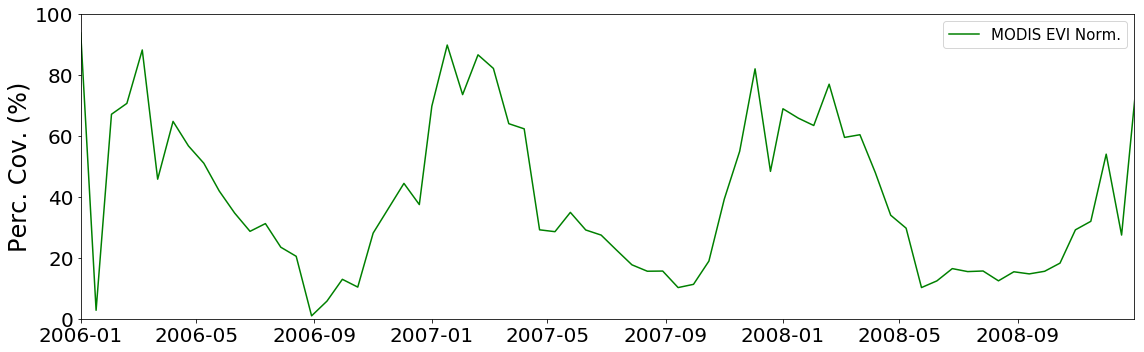

<Figure size 1280x400 with 0 Axes>

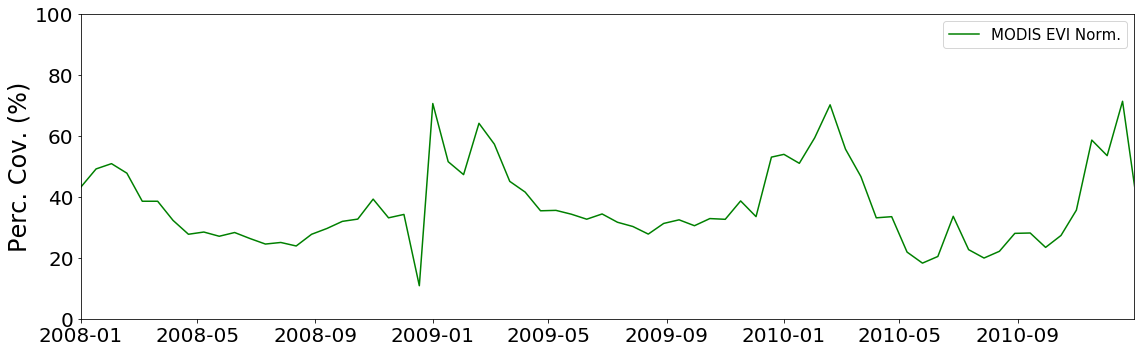

<Figure size 1280x400 with 0 Axes>

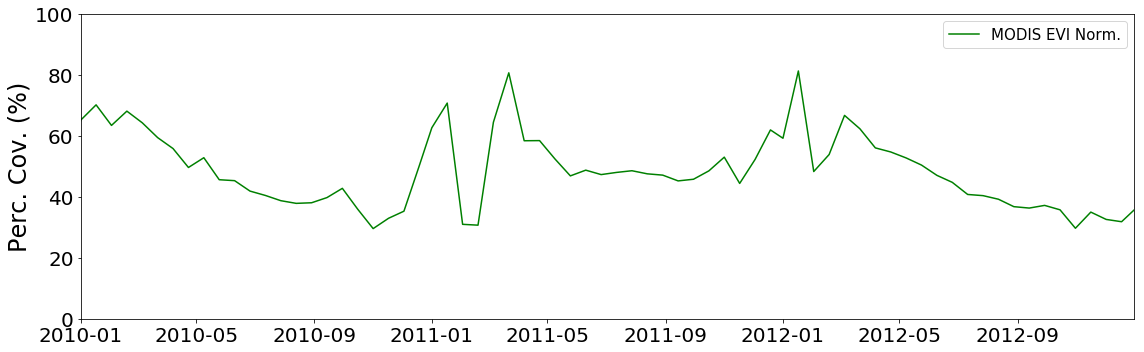

<Figure size 1280x400 with 0 Axes>

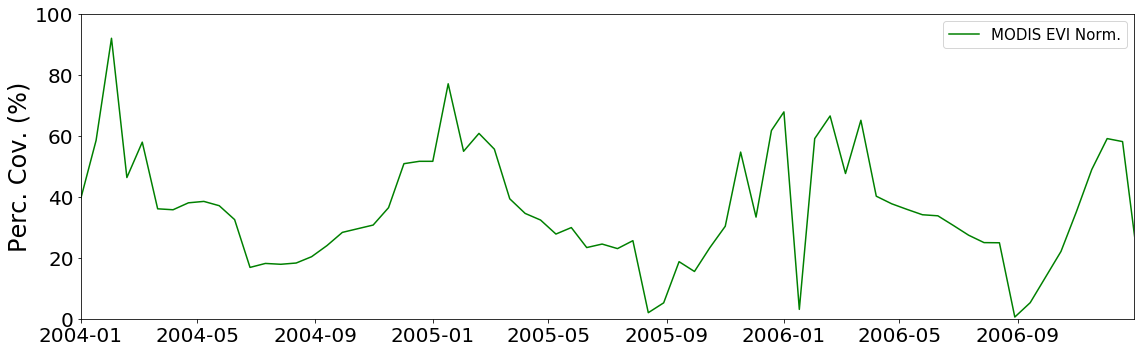

<Figure size 1280x400 with 0 Axes>

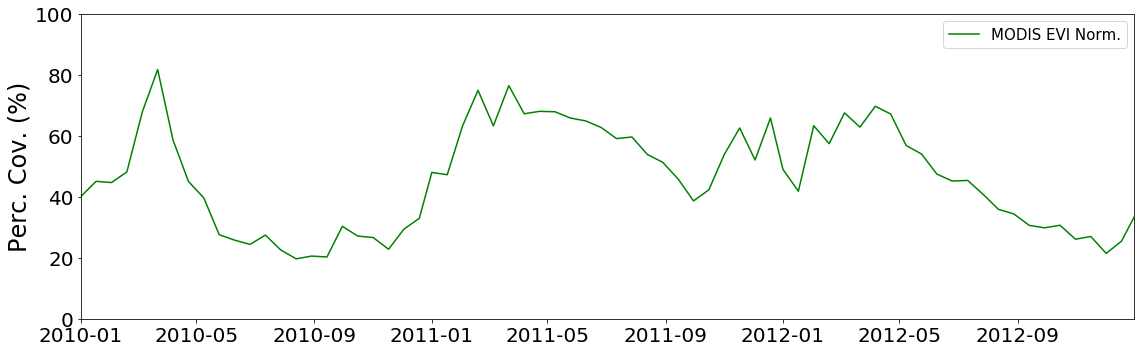

In [28]:
#make plots percentage vegetation cover vs modis evi 
#compare with flux towers


#year to plot per catchment
yearstart = [2006, 2008, 2010, 2004, 2010]
yearend = [2008, 2010, 2012, 2006, 2012] 


suffix = ['1']
suff_evi = ['adelaide', 'daly', 'dry', 'howard', 'sturt']
      
pcmax = []
pcmin = []

evi_dates = np.genfromtxt('../data/MODIS/dates_modis', dtype='str')
evi_dates = pd.to_datetime(evi_dates)
   
fpar_dates = np.genfromtxt('../data/MODIS/dates_fpar', dtype='str')
fpar_dates = pd.to_datetime(fpar_dates)
lai_dates = fpar_dates

    
    
for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
    
    evi = np.loadtxt('../data/MODIS/evi_' +  suff_evi[ibasin] +'.txt')
    fpar = np.loadtxt('../data/MODIS/fpar_' +  suff_evi[ibasin] +'.txt')
    lai = np.loadtxt('../data/MODIS/lai_' +  suff_evi[ibasin] +'.txt')

    pcmax = []
    pcmin = []
    
    for irun in range(0, 1):

        #load emax
        exec("pcmax.append(np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/pcmax" + suffix[irun] + ".txt'))") #mm/d

        #load emin
        exec("pcmin.append(np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/pcmin" + suffix[irun] + ".txt'))") #mm/d
    
    
    exec( "tm = tmod" + str(ibasin))    
    exec( "to = tflux" + str(ibasin))    
 
 
    fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
    fig, ax0,   = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))    
    
    #for irun in range(0, 1):
    #    ax0.fill_between(tm[0:len(pcmax[irun])], pcmax[irun]*100,  pcmin[irun]*100, facecolor='red', color = 'red', label='mod') #basin-scale
    
    evi[evi < 0] = np.mean(evi)
    print(min(evi))
    
    ax0.plot(evi_dates, 100* (evi - min(evi))/(max(evi)-min(evi)), color='green', label= 'MODIS EVI Norm.')
    #ax0.plot(evi_dates, 100* evi , color='green', label= 'MODIS EVI Norm.')

    #ax0.plot(fpar_dates, fpar, color='blue', label= 'MODIS fpar (%)')
    #ax0.plot(lai_dates, lai, color='gray', label= 'MODIS LAI (%)')

    ax0.set_xlim([datetime(yearstart[ibasin],1, 1), datetime( yearend[ibasin] ,12, 31)])  
    ax0.set_ylim([0, 100])    
    ax0.legend()
    
    ax0.set_ylabel('Perc. Cov. (%)', size=24  )
    
    for tick in ax0.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for tick in ax0.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    ax0.legend(prop={'size':15})
    
    
    #fig.suptitle(basin[ibasin], x=0, y=1)
    plt.tight_layout()
    i_site = i_site + 1

plt.show()



## NCP Results






<Figure size 1280x400 with 0 Axes>

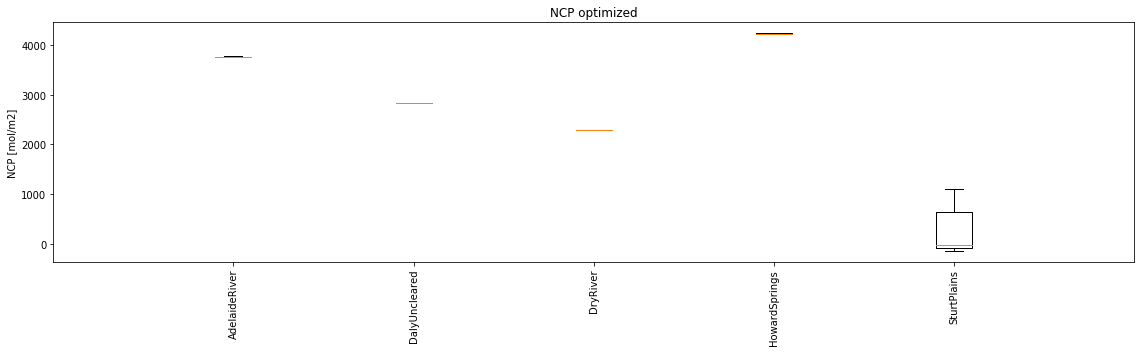

In [17]:
#plot ncp-values

basin = ["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"]
  
ibasin = 3
suffix = ['1', '_p']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16, 5)) 

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  

    ncp_tmp = []
    for irun in range(0,1):
        exec("ncp_tmp.append( " 
             + "np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ncp_total" + suffix[irun] +".txt'))")    

    ncp_tmp = np.concatenate(ncp_tmp)
    ax1.boxplot(ncp_tmp, positions = [ibasin], widths=0.2, showfliers=False) 
      
ax1.set_title("NCP optimized") 
ax1.set_xlim( -1, 5  )   
ax1.set_xticks( [0,1,2,3,4] )  
ax1.set_xticklabels( basin , rotation=90 )  
ax1.set_ylabel("NCP [mol/m2]")   

plt.tight_layout()

plt.show()




## Performance measures 
The boxplots correspond to the results of the 10% best SCE-runs. The calculated statistics are:

- Relative error between modelled and observed 1-day autocorrelation

- Bias

- Squared correlation coefficient

- Squared correlation coefficient between the time series corrected for seasonality

- Squared correlation coefficient between the time series corrected for seasonality and trend


The wet season and dry season are defined as the months December-March and May-September, respectively.



/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


<Figure size 1280x400 with 0 Axes>

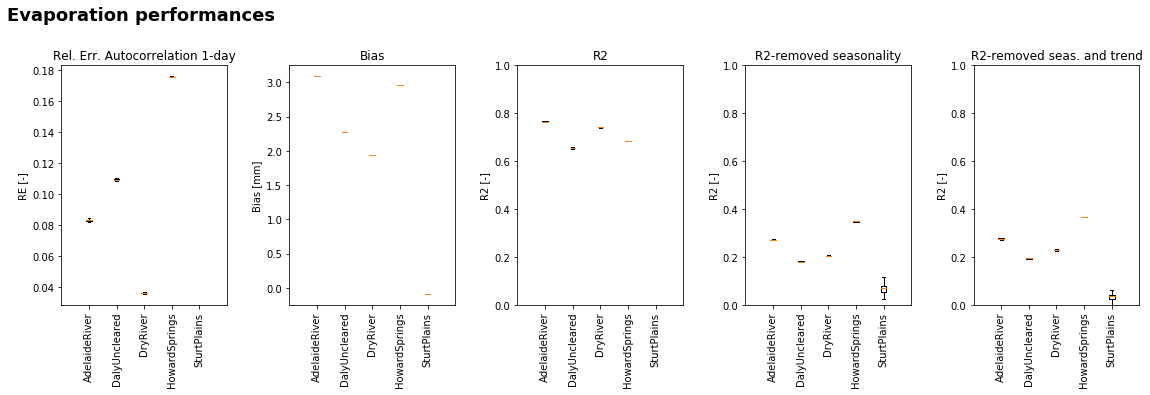

In [18]:
#plot statistics merged
#plot statistics for evaporation
#compare with flux towers


#plot statistics for evaporation

colors = ['red', 'green', 'orange', 'purple']
#colors = ['red', 'red', 'red', 'red']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ((ax0, ax1, ax2, ax3, ax4) )  = plt.subplots(nrows=1, ncols=5, figsize=(16, 5)) 

   
suffix = ['1']

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  

    e_ac_tmp = []
    e_bias_tmp = []
    e_r2_tmp = []
    e_r2decomp_tmp = []
    e_r2decomp2_tmp = []

    for irun in range(0,1):

            #load e-stats
        exec("e_ac_tmp.append( " + 
             "np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] +"_ac.txt'))") 

        exec("e_bias_tmp.append("   + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_bias.txt'))")

        exec("e_r2_tmp.append(" +
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_r2.txt'))")         

        exec("e_r2decomp_tmp.append("  +
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_r2decomp.txt', usecols=(0,)))")       

        exec("e_r2decomp2_tmp.append("  +
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_r2decomp.txt', usecols=(1,)))")           

    e_ac_tmp = np.concatenate( e_ac_tmp )
    e_bias_tmp = np.concatenate( e_bias_tmp)
    e_r2_tmp = np.concatenate(e_r2_tmp)
    e_r2decomp_tmp = np.concatenate(e_r2decomp_tmp)
    e_r2decomp2_tmp = np.concatenate(e_r2decomp2_tmp)

    ax0.boxplot(e_ac_tmp, positions = [ibasin], widths=0.2, showfliers=False) 
    ax1.boxplot(e_bias_tmp, positions = [ibasin], widths=0.2, showfliers=False)  
    ax2.boxplot(e_r2_tmp, positions = [ibasin], widths=0.2, showfliers=False) 
    ax3.boxplot(e_r2decomp_tmp, positions = [ibasin], widths=0.2, showfliers=False) 
    ax4.boxplot(e_r2decomp2_tmp, positions = [ibasin], widths=0.2, showfliers=False) 

    #ax0.set_ylim([0,1])  
    ax0.set_title("Rel. Err. Autocorrelation 1-day") 
    ax0.set_xlim( -1, 5 )   
    ax0.set_xticks( [0,1,2,3,4] )  
    ax0.set_xticklabels( basin, rotation=90 )  
    ax0.set_ylabel("RE [-]")  

    #ax1.set_ylim([0,10])  
    ax1.set_title("Bias")  
    ax1.set_xlim( -1, 5  )     
    ax1.set_xticks( [0,1,2,3,4] )  
    ax1.set_xticklabels( basin, rotation=90 )  
    ax1.set_ylabel("Bias [mm]")  

    #ax2.set_ylim([0,1]) 
    ax2.set_title("R2")  
    ax2.set_xlim( -1, 5  ) 
    ax2.set_ylim( 0, 1  ) 
    ax2.set_xticks( [0,1,2,3,4] )  
    ax2.set_xticklabels( basin, rotation=90 )  
    ax2.set_ylabel("R2 [-]")  

    #ax3.set_ylim([0,1])  
    ax3.set_title("R2-removed seasonality")
    ax3.set_xlim( -1, 5  ) 
    ax3.set_ylim( 0, 1  ) 
    ax3.set_xticks( [0,1,2,3,4] )  
    ax3.set_xticklabels( basin, rotation=90 )   
    ax3.set_ylabel("R2 [-]")  

    #ax4.set_ylim([0,1])  
    ax4.set_title("R2-removed seas. and trend") 
    ax4.set_xlim( -1, 5  ) 
    ax4.set_ylim( 0, 1  ) 
    ax4.set_xticks( [0,1,2,3,4] )  
    ax4.set_xticklabels( basin, rotation=90 )   
    ax4.set_ylabel("R2 [-]")  

plt.figtext( x=0, y=1.05, s="Evaporation performances", weight='bold', fontsize = 18)
plt.tight_layout()

plt.show()




/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


<Figure size 1280x800 with 0 Axes>

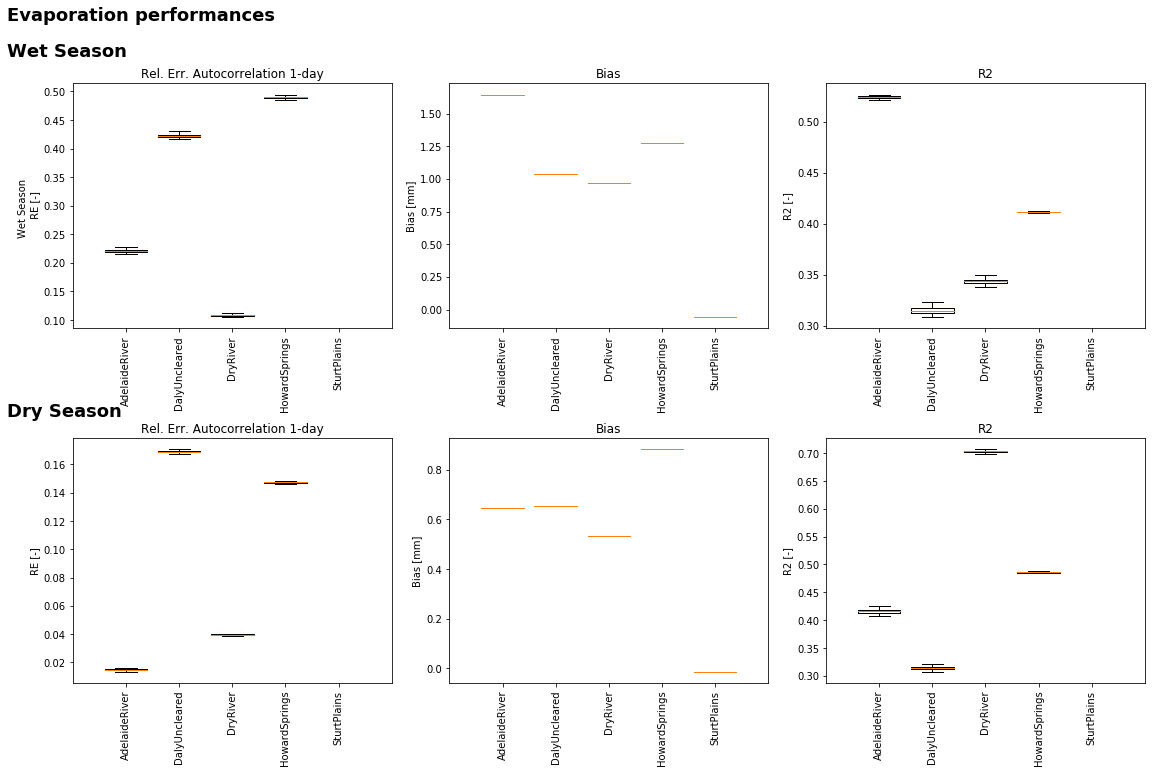

In [19]:
#seasonal statistics evaporation

suffix = ['1', ]

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
fig, ( (ax0, ax1, ax2), (ax3, ax4, ax5) )  = plt.subplots(nrows=2, ncols=3, figsize=(16, 10)) 

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
    
    e_wet_ac_tmp = []
    e_wet_bias_tmp = []
    e_wet_r2_tmp = []
    e_dry_ac_tmp = []
    e_dry_bias_tmp = []
    e_dry_r2_tmp = []    
    
    for irun in range(0,1):
        #load e-stats wet season
        exec("e_wet_ac_tmp.append( " + 
             "np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" + suffix[irun] +"_wet_ac.txt'))") 

        exec("e_wet_bias_tmp.append( "  + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + "_wet_bias.txt'))")

        exec("e_wet_r2_tmp.append( " + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + "_wet_r2.txt'))")   


        #load e-stats dry season
        exec("e_dry_ac_tmp.append(" + 
             "np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" + suffix[irun] +"_dry_ac.txt'))") 

        exec("e_dry_bias_tmp.append( " +
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + "_dry_bias.txt'))")

        exec("e_dry_r2_tmp.append( " + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" + suffix[irun] + "_dry_r2.txt'))")   
     
    e_wet_ac_tmp = np.concatenate(( e_wet_ac_tmp ))
    e_wet_bias_tmp = np.concatenate(( e_wet_bias_tmp ))
    e_wet_r2_tmp = np.concatenate((e_wet_r2_tmp ))

    e_dry_ac_tmp = np.concatenate(( e_dry_ac_tmp ))
    e_dry_bias_tmp = np.concatenate(( e_dry_bias_tmp ))
    e_dry_r2_tmp = np.concatenate((e_dry_r2_tmp ))
       
    ax0.boxplot(e_wet_ac_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    ax1.boxplot(e_wet_bias_tmp, positions = [ibasin], widths=0.8, showfliers=False)  
    ax2.boxplot(e_wet_r2_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    
    ax3.boxplot(e_dry_ac_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    ax4.boxplot(e_dry_bias_tmp, positions = [ibasin], widths=0.8, showfliers=False)  
    ax5.boxplot(e_dry_r2_tmp, positions = [ibasin], widths=0.8, showfliers=False)     


#ax0.set_ylim([0,1])  
ax0.set_title("Rel. Err. Autocorrelation 1-day") 
ax0.set_xlim( -1, 5  )   
ax0.set_xticks( [0,1,2,3,4] )  
ax0.set_xticklabels( basin, rotation=90 )  
ax0.set_ylabel("Wet Season \n RE [-]")  

#ax1.set_ylim([0,10])  
ax1.set_title("Bias")  
ax1.set_xlim( -1, 5  )     
ax1.set_xticks( [0,1,2,3,4] )  
ax1.set_xticklabels( basin, rotation=90 )  
ax1.set_ylabel("Bias [mm]")  

#ax2.set_ylim([0,1]) 
ax2.set_title("R2")  
ax2.set_xlim( -1, 5  ) 
ax2.set_xticks( [0,1,2,3,4] )  
ax2.set_xticklabels( basin, rotation=90 )  
ax2.set_ylabel("R2 [-]")  

#ax0.set_ylim([0,1])  
ax3.set_title("Rel. Err. Autocorrelation 1-day") 
ax3.set_xlim( -1, 5  )   
ax3.set_xticks( [0,1,2,3,4] )  
ax3.set_xticklabels( basin, rotation=90 )  
ax3.set_ylabel("RE [-]")  

#ax1.set_ylim([0,10])  
ax4.set_title("Bias")  
ax4.set_xlim( -1, 5  )     
ax4.set_xticks( [0,1,2,3,4] )  
ax4.set_xticklabels( basin, rotation=90 )  
ax4.set_ylabel("Bias [mm]")  

#ax2.set_ylim([0,1]) 
ax5.set_title("R2")  
ax5.set_xlim( -1, 5  ) 
ax5.set_xticks( [0,1,2,3,4] )  
ax5.set_xticklabels( basin, rotation=90 )  
ax5.set_ylabel("R2 [-]")  


plt.figtext( x=0, y=1.05, s="Evaporation performances", weight='bold', fontsize = 18)
plt.figtext( x=0, y=1, s="Wet Season", weight='bold', fontsize = 18)
plt.figtext( x=0, y=0.5, s="Dry Season",weight='bold', fontsize = 18)

plt.tight_layout()
    
plt.show()






/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


<Figure size 1280x400 with 0 Axes>

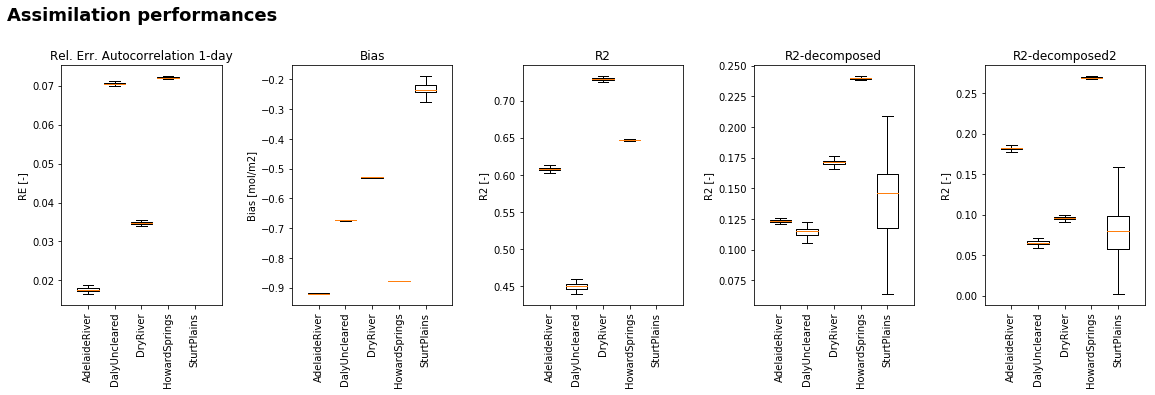

In [20]:
#plot statistics for assimilation

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ((ax0, ax1, ax2, ax3, ax4) )  = plt.subplots(nrows=1, ncols=5, figsize=(16, 5)) 

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
        
    ass_ac_tmp = []
    ass_bias_tmp = []
    ass_r2_tmp = []
    ass_r2decomp_tmp = []
    ass_r2decomp2_tmp = []
    
    for irun in range(0,1):

        #load ass-stats
        exec("ass_ac_tmp.append( " +  
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] +"_ac.txt'))") 

        exec("ass_bias_tmp.append( " +  
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_bias.txt'))")

        exec("ass_r2_tmp.append( " + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_r2.txt'))")         

        exec("ass_r2decomp_tmp.append( "  + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_r2decomp.txt', usecols=(0,)))")       

        exec("ass_r2decomp2_tmp.append( "  + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_r2decomp.txt', usecols=(1,)))")           

    
    ass_ac_tmp = np.concatenate(( ass_ac_tmp ))
    ass_bias_tmp = np.concatenate(( ass_bias_tmp ))
    ass_r2_tmp = np.concatenate((ass_r2_tmp ))
    ass_r2decomp_tmp = np.concatenate((ass_r2decomp_tmp ))
    ass_r2decomp2_tmp = np.concatenate((ass_r2decomp2_tmp ))
       
    #for irun in range(0,4):
    ax0.boxplot(ass_ac_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    ax1.boxplot(ass_bias_tmp, positions = [ibasin], widths=0.8, showfliers=False)  
    ax2.boxplot(ass_r2_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    ax3.boxplot(ass_r2decomp_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    ax4.boxplot(ass_r2decomp2_tmp, positions = [ibasin], widths=0.8, showfliers=False) 


#ax0.set_ylim([0,1])  
ax0.set_title("Rel. Err. Autocorrelation 1-day") 
ax0.set_xlim( -1, 5  )   
ax0.set_xticks( [0,1,2,3,4] )  
ax0.set_xticklabels( basin, rotation=90 )  
ax0.set_ylabel("RE [-]")  

#ax1.set_ylim([0,10])  
ax1.set_title("Bias")  
ax1.set_xlim( -1, 5  )     
ax1.set_xticks( [0,1,2,3,4] )  
ax1.set_xticklabels( basin, rotation=90 )  
ax1.set_ylabel("Bias [mol/m2]")  

#ax2.set_ylim([0,1]) 
ax2.set_title("R2")  
ax2.set_xlim( -1, 5  ) 
ax2.set_xticks( [0,1,2,3,4] )  
ax2.set_xticklabels( basin, rotation=90 )  
ax2.set_ylabel("R2 [-]")  

#ax3.set_ylim([0,1])  
ax3.set_title("R2-decomposed") 
ax3.set_xlim( -1, 5  ) 
ax3.set_xticks( [0,1,2,3,4] )  
ax3.set_xticklabels( basin, rotation=90 )  
ax3.set_ylabel("R2 [-]")  

#ax4.set_ylim([0,1])  
ax4.set_title("R2-decomposed2") 
ax4.set_xlim( -1, 5  ) 
ax4.set_xticks( [0,1,2,3,4] )  
ax4.set_xticklabels( basin, rotation=90 )  
ax4.set_ylabel("R2 [-]")  

plt.figtext( x=0, y=1.05, s="Assimilation performances", weight='bold', fontsize = 18)

#        fig.suptitle(basin[ibasin], x=0, y=1)
plt.tight_layout()
    
plt.show()


/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


<Figure size 1280x800 with 0 Axes>

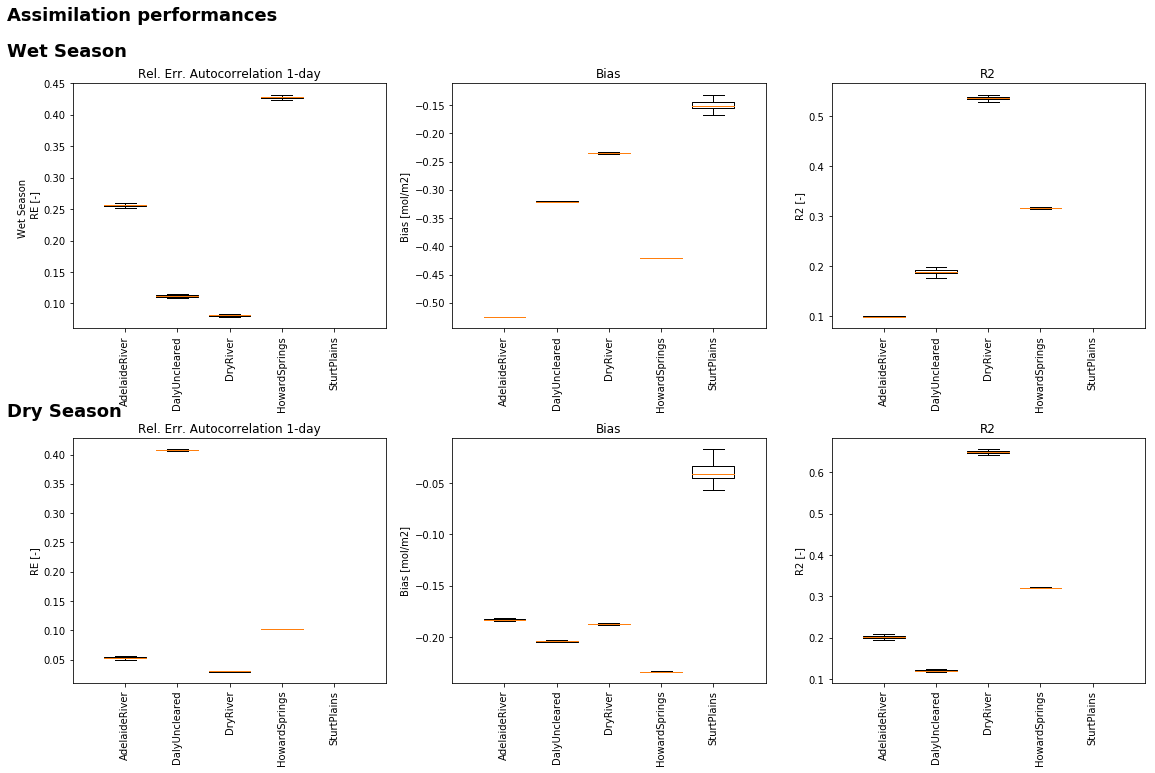

In [21]:
#seasonal statistics

#plot statistics merged
#plot statistics for evaporation
#compare with flux towers

suffix = ['1']

colors = ['red', 'green', 'orange', 'purple']
#colors = ['red', 'red', 'red', 'red']

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
fig, ( (ax0, ax1, ax2), (ax3, ax4, ax5) )  = plt.subplots(nrows=2, ncols=3, figsize=(16, 10)) 

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
    
    ass_wet_ac_tmp = []
    ass_wet_bias_tmp = []
    ass_wet_r2_tmp = []
    ass_dry_ac_tmp = []
    ass_dry_bias_tmp = []
    ass_dry_r2_tmp = []       
    
    for irun in range(0,1):

        #load ass-stats
        exec("ass_dry_ac_tmp.append( " + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] +"_dry_ac.txt'))") 

        exec("ass_dry_bias_tmp.append(" + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_dry_bias.txt'))")

        exec("ass_dry_r2_tmp.append(" + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_dry_r2.txt'))")         

        #load ass-stats
        exec("ass_wet_ac_tmp.append(" + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] +"_wet_ac.txt'))") 

        exec("ass_wet_bias_tmp.append(" + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_wet_bias.txt'))")

        exec("ass_wet_r2_tmp.append(" + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_wet_r2.txt'))")   
    
    ass_wet_ac_tmp = np.concatenate(( ass_wet_ac_tmp ))
    ass_wet_bias_tmp = np.concatenate(( ass_wet_bias_tmp ))
    ass_wet_r2_tmp = np.concatenate((ass_wet_r2_tmp ))

    ass_dry_ac_tmp = np.concatenate(( ass_dry_ac_tmp ))
    ass_dry_bias_tmp = np.concatenate(( ass_dry_bias_tmp ))
    ass_dry_r2_tmp = np.concatenate((ass_dry_r2_tmp ))
       
    ax0.boxplot(ass_wet_ac_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    ax1.boxplot(ass_wet_bias_tmp, positions = [ibasin], widths=0.8, showfliers=False)  
    ax2.boxplot(ass_wet_r2_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    
    ax3.boxplot(ass_dry_ac_tmp, positions = [ibasin], widths=0.8, showfliers=False) 
    ax4.boxplot(ass_dry_bias_tmp, positions = [ibasin], widths=0.8, showfliers=False)  
    ax5.boxplot(ass_dry_r2_tmp, positions = [ibasin], widths=0.8, showfliers=False)     


#ax0.set_ylim([0,1])  
ax0.set_title("Rel. Err. Autocorrelation 1-day") 
ax0.set_xlim( -1, 5  )   
ax0.set_xticks( [0,1,2,3,4] )  
ax0.set_xticklabels( basin, rotation=90 )  
ax0.set_ylabel("Wet Season \n RE [-]")  


#ax1.set_ylim([0,10])  
ax1.set_title("Bias")  
ax1.set_xlim( -1, 5  )     
ax1.set_xticks( [0,1,2,3,4] )  
ax1.set_xticklabels( basin, rotation=90 )  
ax1.set_ylabel("Bias [mol/m2]")  

#ax2.set_ylim([0,1]) 
ax2.set_title("R2")  
ax2.set_xlim( -1, 5  ) 
ax2.set_xticks( [0,1,2,3,4] )  
ax2.set_xticklabels( basin, rotation=90 )  
ax2.set_ylabel("R2 [-]")  

#ax0.set_ylim([0,1])  
ax3.set_title("Rel. Err. Autocorrelation 1-day") 
ax3.set_xlim( -1, 5  )   
ax3.set_xticks( [0,1,2,3,4] )  
ax3.set_xticklabels( basin, rotation=90 )  
ax3.set_ylabel("RE [-]")  

#ax1.set_ylim([0,10])  
ax4.set_title("Bias")  
ax4.set_xlim( -1, 5  )     
ax4.set_xticks( [0,1,2,3,4] )  
ax4.set_xticklabels( basin, rotation=90 )  
ax4.set_ylabel("Bias [mol/m2]")  

#ax2.set_ylim([0,1]) 
ax5.set_title("R2")  
ax5.set_xlim( -1, 5  ) 
ax5.set_xticks( [0,1,2,3,4] )  
ax5.set_xticklabels( basin, rotation=90 )  
ax5.set_ylabel("R2 [-]")  


plt.figtext( x=0, y=1.05, s="Assimilation performances", weight='bold', fontsize = 18)
plt.figtext( x=0, y=1, s="Wet Season", weight='bold', fontsize = 18)
plt.figtext( x=0, y=0.5, s="Dry Season",weight='bold', fontsize = 18)

#fig.suptitle("Dry Season", x=0, y=-2)

plt.tight_layout()
    
plt.show()


## Ordered performances
The different performance measures are now ordered according to mean precipitation, temperature and NCP. 

To observe:

- Correlations increase with increasing rainfall. Quite contrasting, as performance during the wet season decreased. Long term dynamics correct, short term incorrect?

- The correlations become better when the NCP-values are higher. So this could mean that we did not achieve the highest NCP-values in all cases, maybe due to restrictions in the parameter ranges. 




/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


<Figure size 1280x400 with 0 Axes>

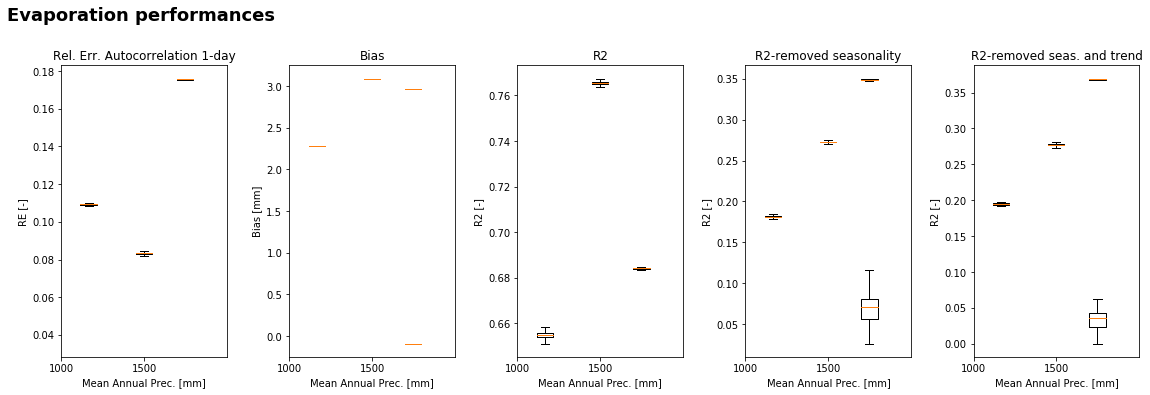

In [22]:
MAP = np.zeros((5))

#MAP[0] = np.mean(data_adelaide[:,6])
prec_pd = pd.Series(data_adelaide[0:len(tmod0),6], index = tmod0)
MAP[0] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_daly[0:len(tmod1),6], index = tmod1)
MAP[1] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_dry[0:len(tmod2),6], index = tmod2)
MAP[2] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_howard[0:len(tmod3),6], index = tmod3)
MAP[3] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_howard[0:len(tmod4),6], index = tmod4)
MAP[4] = np.mean(prec_pd.resample('A').sum())

colors = ['red', 'green', 'orange', 'purple']
#colors = ['red', 'red', 'red', 'red']


#plot statistics merged
#plot statistics for evaporation
#compare with flux towers


#plot statistics for evaporation

colors = ['red', 'green', 'orange', 'purple']
#colors = ['red', 'red', 'red', 'red']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ((ax0, ax1, ax2, ax3, ax4) )  = plt.subplots(nrows=1, ncols=5, figsize=(16, 5)) 

   
suffix = ['1']

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  

    e_ac_tmp = []
    e_bias_tmp = []
    e_r2_tmp = []
    e_r2decomp_tmp = []
    e_r2decomp2_tmp = []

    for irun in range(0,1):

            #load e-stats
        exec("e_ac_tmp.append( " + 
             "np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] +"_ac.txt'))") 

        exec("e_bias_tmp.append("   + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_bias.txt'))")

        exec("e_r2_tmp.append(" +
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_r2.txt'))")         

        exec("e_r2decomp_tmp.append("  +
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_r2decomp.txt', usecols=(0,)))")       

        exec("e_r2decomp2_tmp.append("  +
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/e" +  suffix[irun] + "_r2decomp.txt', usecols=(1,)))")           

    e_ac_tmp = np.concatenate( e_ac_tmp )
    e_bias_tmp = np.concatenate( e_bias_tmp)
    e_r2_tmp = np.concatenate(e_r2_tmp)
    e_r2decomp_tmp = np.concatenate(e_r2decomp_tmp)
    e_r2decomp2_tmp = np.concatenate(e_r2decomp2_tmp)


    ax0.boxplot(e_ac_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 
    ax1.boxplot(e_bias_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False)  
    ax2.boxplot(e_r2_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 
    ax3.boxplot(e_r2decomp_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 
    ax4.boxplot(e_r2decomp2_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 


#ax0.set_ylim([0,1])  
ax0.set_title("Rel. Err. Autocorrelation 1-day") 
ax0.set_xticks( range(0,2000, 500) )  
ax0.set_xticklabels( range(0,2000, 500) )  
ax0.set_xlim( 1000, 2000  )   
ax0.set_ylabel("RE [-]")  
ax0.set_xlabel("Mean Annual Prec. [mm]")  

#ax1.set_ylim([0,10])  
ax1.set_title("Bias")  
ax1.set_xticks( range(0,2000, 500) )  
ax1.set_xticklabels( range(0,2000, 500) ) 
ax1.set_xlim( 1000, 2000  )   
ax1.set_ylabel("Bias [mm]")  
ax1.set_xlabel("Mean Annual Prec. [mm]")  

#ax2.set_ylim([0,1]) 
ax2.set_title("R2")  
ax2.set_xticks( range(0,2000, 500) )  
ax2.set_xticklabels( range(0,2000, 500) ) 
ax2.set_xlim( 1000, 2000  )   
ax2.set_ylabel("R2 [-]")  
ax2.set_xlabel("Mean Annual Prec. [mm]")  

#ax3.set_ylim([0,1])  
ax3.set_title("R2-removed seasonality")
ax3.set_xticks( range(0,2000, 500) )  
ax3.set_xticklabels( range(0,2000, 500) ) 
ax3.set_xlim( 1000, 2000  )   
ax3.set_ylabel("R2 [-]")  
ax3.set_xlabel("Mean Annual Prec. [mm]") 

#ax4.set_ylim([0,1])  
ax4.set_title("R2-removed seas. and trend") 
ax4.set_xticks( range(0,2000, 500) )  
ax4.set_xticklabels( range(0,2000, 500) )
ax4.set_xlim( 1000, 2000  )   
ax4.set_ylabel("R2 [-]")  
ax4.set_xlabel("Mean Annual Prec. [mm]")  

plt.figtext( x=0, y=1.05, s="Evaporation performances", weight='bold', fontsize = 18)
plt.tight_layout()

plt.show()



/home/remko/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/remko/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


<Figure size 1280x400 with 0 Axes>

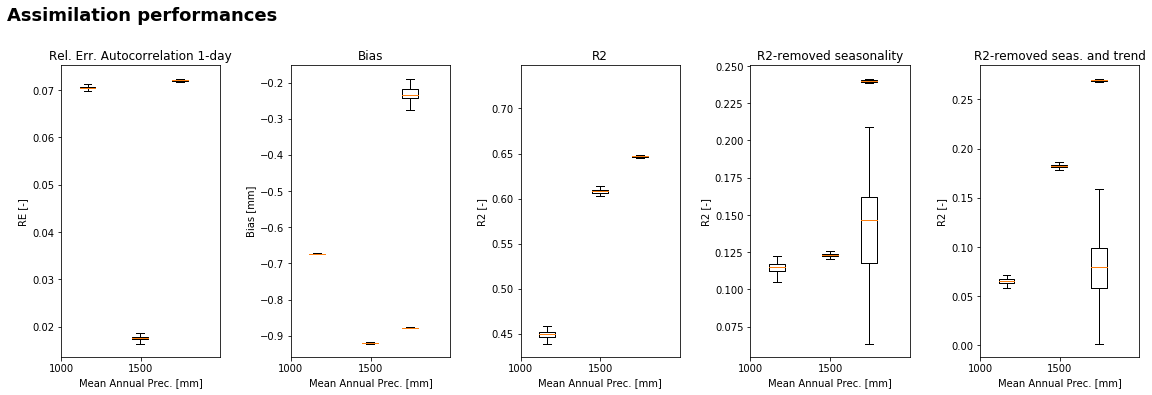

In [23]:
MAP = np.zeros((5))

prec_pd = pd.Series(data_adelaide[0:len(tmod0),6], index = tmod0)
MAP[0] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_daly[0:len(tmod1),6], index = tmod1)
MAP[1] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_dry[0:len(tmod2),6], index = tmod2)
MAP[2] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_howard[0:len(tmod3),6], index = tmod3)
MAP[3] = np.mean(prec_pd.resample('A').sum())

prec_pd = pd.Series(data_howard[0:len(tmod4),6], index = tmod4)
MAP[4] = np.mean(prec_pd.resample('A').sum())

colors = ['red', 'green', 'orange', 'purple']
#colors = ['red', 'red', 'red', 'red']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ((ax0, ax1, ax2, ax3, ax4) )  = plt.subplots(nrows=1, ncols=5, figsize=(16, 5)) 

for ibasin in  np.array([0, 1, 2, 3, 4 ]):  
    
    ass_ac_tmp = []
    ass_bias_tmp = []
    ass_r2_tmp = []
    ass_r2decomp_tmp = []
    ass_r2decomp2_tmp = []
    
    for irun in range(0,1):

        #load ass-stats
        exec("ass_ac_tmp.append( " +  
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] +"_ac.txt'))") 

        exec("ass_bias_tmp.append( " +  
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_bias.txt'))")

        exec("ass_r2_tmp.append( " + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_r2.txt'))")         

        exec("ass_r2decomp_tmp.append( "  + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_r2decomp.txt', usecols=(0,)))")       

        exec("ass_r2decomp2_tmp.append( "  + 
             " np.loadtxt('../output/" + basin[ibasin] + "/result_freedrainage/ass" + suffix[irun] + "_r2decomp.txt', usecols=(1,)))")           

    
    ass_ac_tmp = np.concatenate(( ass_ac_tmp ))
    ass_bias_tmp = np.concatenate(( ass_bias_tmp ))
    ass_r2_tmp = np.concatenate((ass_r2_tmp ))
    ass_r2decomp_tmp = np.concatenate((ass_r2decomp_tmp ))
    ass_r2decomp2_tmp = np.concatenate((ass_r2decomp2_tmp ))


    #for irun in range(0,4):
    ax0.boxplot(ass_ac_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 
    ax1.boxplot(ass_bias_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False)  
    ax2.boxplot(ass_r2_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 
    ax3.boxplot(ass_r2decomp_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 
    ax4.boxplot(ass_r2decomp2_tmp, positions = [MAP[ibasin]], widths=100, showfliers=False) 


#ax0.set_ylim([0,1])  
ax0.set_title("Rel. Err. Autocorrelation 1-day") 
ax0.set_xticks( range(0,2000, 500) )  
ax0.set_xticklabels( range(0,2000, 500) )  
ax0.set_xlim( 1000, 2000  )   
ax0.set_ylabel("RE [-]")  
ax0.set_xlabel("Mean Annual Prec. [mm]")  

#ax1.set_ylim([0,10])  
ax1.set_title("Bias")  
ax1.set_xticks( range(0,2000, 500) )  
ax1.set_xticklabels( range(0,2000, 500) ) 
ax1.set_xlim( 1000, 2000  )   
ax1.set_ylabel("Bias [mm]")  
ax1.set_xlabel("Mean Annual Prec. [mm]")  

#ax2.set_ylim([0,1]) 
ax2.set_title("R2")  
ax2.set_xticks( range(0,2000, 500) )  
ax2.set_xticklabels( range(0,2000, 500) ) 
ax2.set_xlim( 1000, 2000  )   
ax2.set_ylabel("R2 [-]")  
ax2.set_xlabel("Mean Annual Prec. [mm]")  

#ax3.set_ylim([0,1])  
ax3.set_title("R2-removed seasonality")
ax3.set_xticks( range(0,2000, 500) )  
ax3.set_xticklabels( range(0,2000, 500) ) 
ax3.set_xlim( 1000, 2000  )   
ax3.set_ylabel("R2 [-]")  
ax3.set_xlabel("Mean Annual Prec. [mm]")  

#ax4.set_ylim([0,1])  
ax4.set_title("R2-removed seas. and trend") 
ax4.set_xticks( range(0,2000, 500) )  
ax4.set_xticklabels( range(0,2000, 500) )
ax4.set_xlim( 1000, 2000  )   
ax4.set_ylabel("R2 [-]")  
ax4.set_xlabel("Mean Annual Prec. [mm]")  

plt.figtext( x=0, y=1.05, s="Assimilation performances", weight='bold', fontsize = 18)
plt.tight_layout()
    
plt.show()


## Parameter values





<Figure size 1280x400 with 0 Axes>

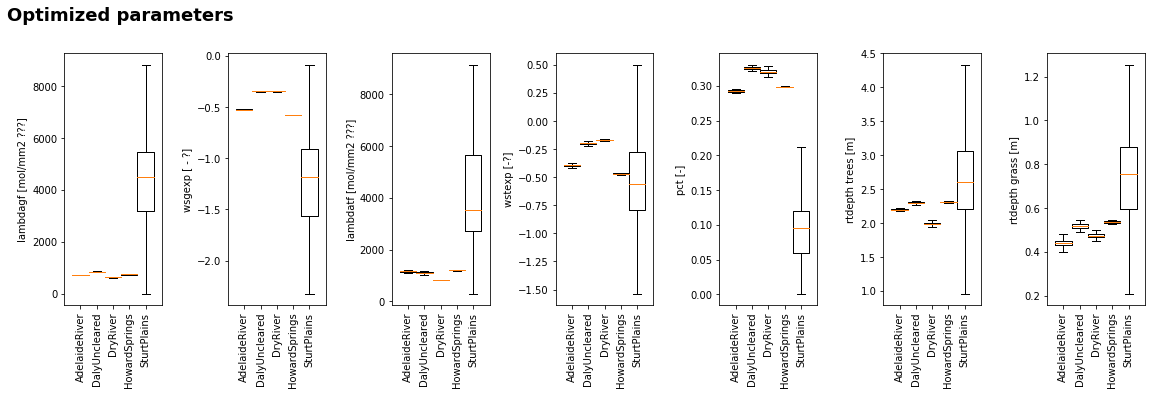

In [24]:
#plot parameters

suffix = ['1']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ((ax0, ax1, ax2, ax3, ax4, ax5, ax6) )  = plt.subplots(nrows=1, ncols=7, figsize=(16, 5)) 

for ibasin in  np.array([0, 1, 2, 3, 4]):  
    
    params_tmp = []
    for irun in range(0,1):

        #loop over files and load
        exec("params_tmp.append(np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/params" + suffix[irun] + ".txt'))") #mm/d
        
    params_tmp = np.concatenate( params_tmp )


    #for irun in range(0,4):
    ax0.boxplot(params_tmp[:,0], positions = [ibasin], widths=1, showfliers=False) 
    ax1.boxplot(params_tmp[:,1], positions = [ibasin], widths=1, showfliers=False)  
    ax2.boxplot(params_tmp[:,2], positions = [ibasin], widths=1, showfliers=False) 
    ax3.boxplot(params_tmp[:,3], positions = [ibasin], widths=1, showfliers=False) 
    ax4.boxplot(params_tmp[:,4], positions = [ibasin], widths=1, showfliers=False) 
    ax5.boxplot(params_tmp[:,5], positions = [ibasin], widths=1, showfliers=False) 
    ax6.boxplot(params_tmp[:,6], positions = [ibasin], widths=1, showfliers=False) 


#ax0.set_ylim([0,10])  
ax0.set_xlim( -1, 5  )     
ax0.set_xticks( [0,1,2,3,4] )  
ax0.set_xticklabels( basin, rotation=90 )  
ax0.set_ylabel("lambdagf [mol/mm2 ???]")  
   

#ax1.set_ylim([0,10])  
ax1.set_xlim( -1, 5  )     
ax1.set_xticks( [0,1,2,3,4] )  
ax1.set_xticklabels( basin, rotation=90 )  
ax1.set_ylabel("wsgexp [ - ?]")  

#ax2.set_ylim([0,1]) 
ax2.set_xlim( -1, 5  ) 
ax2.set_xticks( [0,1,2,3,4] )  
ax2.set_xticklabels( basin, rotation=90 )  
ax2.set_ylabel("lambdatf [mol/mm2 ???]")  

#ax0.set_ylim([0,1])  
ax3.set_xlim( -1, 5  )   
ax3.set_xticks( [0,1,2,3,4] )  
ax3.set_xticklabels( basin, rotation=90 )  
ax3.set_ylabel("wstexp [-?]")  

#ax1.set_ylim([0,10])  
ax4.set_xlim( -1, 5  )     
ax4.set_xticks( [0,1,2,3,4] )  
ax4.set_xticklabels( basin, rotation=90 )  
ax4.set_ylabel("pct [-]")  

#ax2.set_ylim([0,1]) 
ax5.set_xlim( -1, 5  ) 
ax5.set_xticks( [0,1,2,3,4] )  
ax5.set_xticklabels( basin, rotation=90 )  
ax5.set_ylabel("rtdepth trees [m]")  

ax6.set_xlim( -1, 5  ) 
ax6.set_xticks( [0,1,2,3,4] )  
ax6.set_xticklabels( basin, rotation=90 )  
ax6.set_ylabel("rtdepth grass [m]")  


plt.figtext( x=0, y=1.05, s="Optimized parameters", weight='bold', fontsize = 18)
plt.tight_layout()
    
plt.show()




<Figure size 1280x400 with 0 Axes>

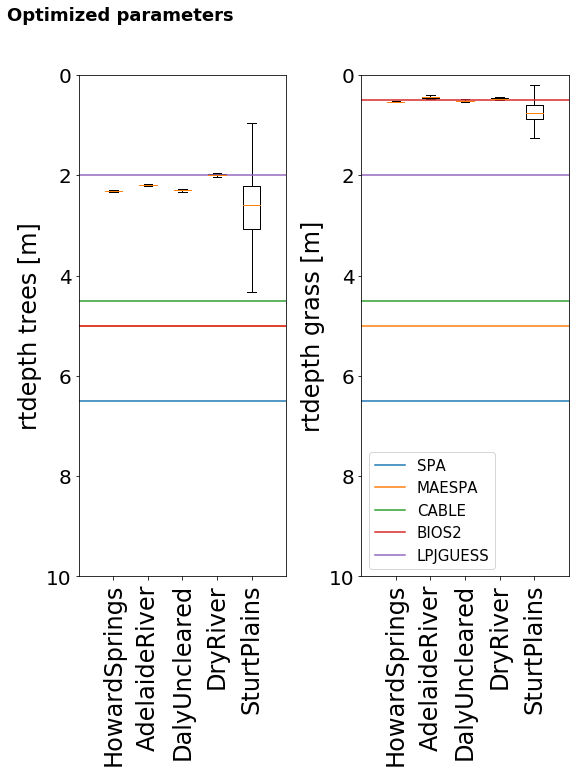

In [25]:
#plot parameters

suffix = ['1']

basin = np.array(["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"])


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, (( ax5, ax6) )  = plt.subplots(nrows=1, ncols=2, figsize=(8, 10)) 

basins_order = [  0, 1, 2, 3, 4   ]
icount = 0
for ibasin in  np.array([ 3, 0, 1, 2, 4 ]):  
    
    params_tmp = []
    for irun in range(0,1):

        #loop over files and load
        exec("params_tmp.append(np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/params" + suffix[irun] + ".txt'))") #mm/d
        
    params_tmp = np.concatenate( params_tmp )


    #for irun in range(0,4):
   
    ax5.boxplot(params_tmp[:,5], positions = [icount], widths=0.5, showfliers=False)     
    ax6.boxplot(params_tmp[:,6], positions = [icount], widths=0.5, showfliers=False) 
    icount = icount + 1 
    
ax5.plot( [-1,6], [6.5,6.5] , label='SPA'  )
ax5.plot( [-1,6], [5, 5] , label='MAESPA'  )
ax5.plot( [-1,6], [4.5,4.5] , label='CABLE'  )
ax5.plot( [-1,6], [5,5] , label='BIOS2'  )
ax5.plot( [-1,6], [2,2] , label='LPJGUESS'  )   
    
    
ax6.plot( [-1,6], [6.5,6.5] , label='SPA'  )
ax6.plot( [-1,6], [5, 5] , label='MAESPA'  )
ax6.plot( [-1,6], [4.5,4.5] , label='CABLE'  )
ax6.plot( [-1,6], [0.5,0.5] , label='BIOS2'  )
ax6.plot( [-1,6], [2,2] , label='LPJGUESS'  )
    
#ax2.set_ylim([0,1]) 
ax5.set_xlim( -1, 5  ) 
ax5.set_ylim( 10, 0  ) 

ax5.set_xticks( [0,1,2,3,4] )  
ax5.set_xticklabels(  basin[ np.array([3, 0, 1, 2, 4]) ], rotation=90, size=24  )  
ax5.set_ylabel("rtdepth trees [m]", size=24 )  

for tick in ax5.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax6.set_xlim( -1, 5  ) 
ax6.set_ylim( 10, 0  ) 

ax6.set_xticks( [0,1,2,3,4] )  
ax6.set_xticklabels( basin[ np.array([3, 0, 1, 2, 4]) ], rotation=90, size=24  )  
ax6.set_ylabel("rtdepth grass [m]", size=24 )  
ax6.legend(prop={'size':15})

for tick in ax6.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)


plt.figtext( x=0, y=1.05, s="Optimized parameters", weight='bold', fontsize = 18)
plt.tight_layout()
    
plt.show()




<Figure size 1280x400 with 0 Axes>

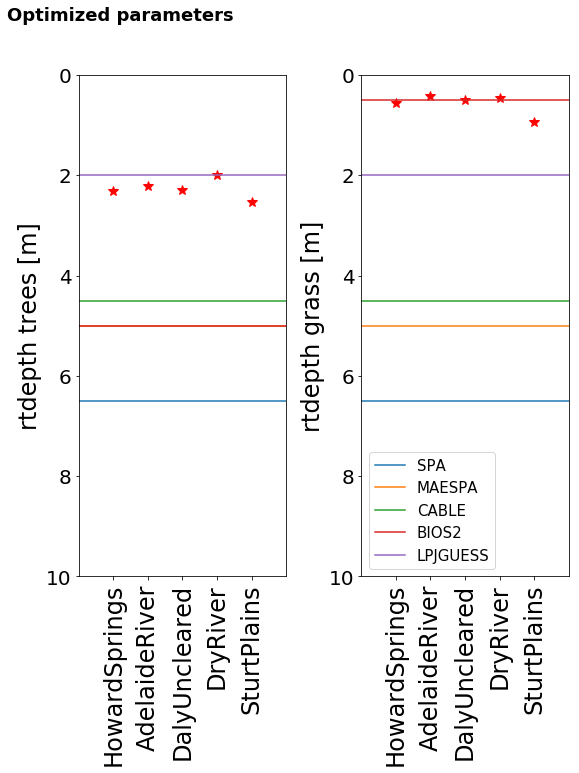

In [26]:
#plot parameters

suffix = ['1']

basin = np.array(["AdelaideRiver", "DalyUncleared", "DryRiver", "HowardSprings", "SturtPlains"])


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, (( ax5, ax6) )  = plt.subplots(nrows=1, ncols=2, figsize=(8, 10)) 

basins_order = [  0, 1, 2, 3, 4   ]
icount = 0
for ibasin in  np.array([ 3, 0, 1, 2, 4 ]):  
    
    params_tmp = []
    for irun in range(0,1):

        #loop over files and load
        exec("params_tmp.append(np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/params" + suffix[irun] + ".txt'))") #mm/d
        
    params_tmp = np.concatenate( params_tmp )


    #for irun in range(0,4):
   
    #ax5.boxplot(params_tmp[:,5], positions = [icount], widths=0.5, showfliers=False)     
    #ax6.boxplot(params_tmp[:,6], positions = [icount], widths=0.5, showfliers=False) 
    ax5.plot(icount, params_tmp[0,5], 'r*' , markersize=10)     
    ax6.plot(icount, params_tmp[0,6], 'r*', markersize=10)  
    icount = icount + 1 
    
ax5.plot( [-1,6], [6.5,6.5] , label='SPA'  )
ax5.plot( [-1,6], [5, 5] , label='MAESPA'  )
ax5.plot( [-1,6], [4.5,4.5] , label='CABLE'  )
ax5.plot( [-1,6], [5,5] , label='BIOS2'  )
ax5.plot( [-1,6], [2,2] , label='LPJGUESS'  )   
    
    
ax6.plot( [-1,6], [6.5,6.5] , label='SPA'  )
ax6.plot( [-1,6], [5, 5] , label='MAESPA'  )
ax6.plot( [-1,6], [4.5,4.5] , label='CABLE'  )
ax6.plot( [-1,6], [0.5,0.5] , label='BIOS2'  )
ax6.plot( [-1,6], [2,2] , label='LPJGUESS'  )
    
#ax2.set_ylim([0,1]) 
ax5.set_xlim( -1, 5  ) 
ax5.set_ylim( 10, 0  ) 

ax5.set_xticks( [0,1,2,3,4] )  
ax5.set_xticklabels(  basin[ np.array([3, 0, 1, 2, 4]) ], rotation=90, size=24  )  
ax5.set_ylabel("rtdepth trees [m]", size=24 )  

for tick in ax5.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

ax6.set_xlim( -1, 5  ) 
ax6.set_ylim( 10, 0  ) 

ax6.set_xticks( [0,1,2,3,4] )  
ax6.set_xticklabels( basin[ np.array([3, 0, 1, 2, 4]) ], rotation=90, size=24  )  
ax6.set_ylabel("rtdepth grass [m]", size=24 )  
ax6.legend(prop={'size':15})

for tick in ax6.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)


plt.figtext( x=0, y=1.05, s="Optimized parameters", weight='bold', fontsize = 18)
plt.tight_layout()
    
plt.show()




In [27]:
for ibasin in  np.array([ 0,1,2,3,4 ]):  #range(3,4):
    
    params_tmp = []
    for irun in range(0,1):

        #loop over files and load
        exec("params_tmp.append(np.loadtxt('../output/" + 
             basin[ibasin] + "/result_freedrainage/params" + suffix[irun] + ".txt'))") #mm/d
        
    params_tmp = np.concatenate( params_tmp )
    
    print(basin[ibasin])
    print("max values:")
    print(np.amax(params_tmp, axis=0))
    print("min values:")
    print(np.amin(params_tmp, axis=0))
    
    
    
    

AdelaideRiver
max values:
[ 7.58506168e+02 -4.91892439e-01  1.30905069e+03 -3.43209553e-01
  3.01008971e-01  2.29261051e+00  5.32487192e-01  3.76901308e+03]
min values:
[ 6.85104875e+02 -5.39458467e-01  1.08693790e+03 -4.31381500e-01
  2.79014609e-01  2.15045280e+00  3.64840305e-01  3.75819328e+03]
DalyUncleared
max values:
[ 8.94034044e+02 -3.33932058e-01  1.21749641e+03 -1.72621100e-01
  3.35825643e-01  2.35296263e+00  5.63148662e-01  2.83694880e+03]
min values:
[ 8.15919342e+02 -3.56873004e-01  1.00002085e+03 -2.32407237e-01
  3.14277722e-01  2.15723876e+00  4.63814364e-01  2.82764656e+03]
DryRiver
max values:
[ 6.89331873e+02 -3.36948789e-01  8.57628193e+02 -1.49486508e-01
  3.32657564e-01  2.08222966e+00  5.49612627e-01  2.28954919e+03]
min values:
[ 6.13590338e+02 -3.64495181e-01  7.94285094e+02 -1.79900983e-01
  3.00064009e-01  1.87427115e+00  3.90174250e-01  2.28355157e+03]
HowardSprings
max values:
[ 7.65824139e+02 -5.31270873e-01  1.23052598e+03 -4.02186579e-01
  3.08047546e-